

```
# This is formatted as code
```

#Importing

In [ ]:
import csv
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Collecting

## NVCS DATA

### Download Personal Crime Victimization

**Json**

In [ ]:
response = requests.get("https://data.ojp.usdoj.gov/resource/gcuy-rt5g.json?$limit=100000").json()
len(response)

63465

In [ ]:
response[0].keys()

dict_keys(['idper', 'yearq', 'year', 'ager', 'sex', 'hispanic', 'race', 'race_ethnicity', 'hincome1', 'hincome2', 'marital', 'popsize', 'region', 'msa', 'locality', 'educatn1', 'educatn2', 'veteran', 'citizen', 'newcrime', 'newoff', 'seriousviolent', 'notify', 'vicservices', 'locationr', 'direl', 'weapon', 'weapcat', 'injury', 'serious', 'treatment', 'offenderage', 'offendersex', 'offtracenew', 'wgtviccy', 'series', 'newwgt'])

**CSV**

In [ ]:
CSV_URL = "https://data.ojp.usdoj.gov/resource/gcuy-rt5g.csv?$limit=100000"

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    file = open('Personal_crime_victimization.csv','w')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        file.write(str(row))

In [ ]:
len(my_list)

63466

### Download Personal population data

**CSV**

In [ ]:
CSV_URL = "https://data.ojp.usdoj.gov/resource/r4j4-fdwx.csv?$query=select%20*%20where%20year%20in%20(%222010%22,%20%222020%22)%20limit%20500000"

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    file = open('Personal_population.csv','w')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        file.write(str(row))

In [ ]:
len(my_list)

438011

In [ ]:
my_list[0]

['idper',
 'yearq',
 'year',
 'ager',
 'sex',
 'hispanic',
 'race',
 'race_ethnicity',
 'hincome1',
 'hincome2',
 'marital',
 'popsize',
 'region',
 'msa',
 'locality',
 'educatn1',
 'educatn2',
 'veteran',
 'citizen',
 'wgtpercy']

## FBI DATA



FBI API: 'gaahNZpPjm43NSaIqSeTTq2x3b4VDHeDGqcP1gd6'


### Download

In [ ]:
offenses = "aggravated-assault,all-other-larceny,all-other-offenses,animal-cruelty,arson,assisting-or-promoting-prostitution,bad-checks,betting,bribery,burglary-breaking-and-entering,counterfeiting-forgery,credit-card-automated-teller-machine-fraud,destruction-damage-vandalism-of-property,driving-under-the-influence,drug-equipment-violations,drug-violations,drunkenness,embezzlement,extortion-blackmail,false-pretenses-swindle-confidence-game,fondling,gambling-equipment-violation,hacking-computer-invasion,human-trafficking-commerical-sex-acts,human-trafficking-commerical-involuntary-servitude,identity-theft,impersonation,incest,intimidation,justifiable-homicide,kidnapping-abduction,motor-vehicle-theft,murder-and-nonnegligent-manslaughter,negligent-manslaughter,operating-promoting-assiting-gambling,curfew-loitering-vagrancy-violations,peeping-tom,pocket-picking,pornography-obscence-material,prostitution,purchasing-prostitution,purse-snatching,rape,robbery,sexual-assult-with-an-object,sex-offenses-non-forcible,shoplifting,simple-assault,sodomy,sports-tampering,statutory-rape,stolen-property-offenses,theft-from-building,theft-from-coin-operated-machine-or-device,theft-from-motor-vehicle,theft-of-motor-vehicle-parts-or-accessories,theft-from-motor-vehicle,weapon-law-violation,welfare-fraud,wire-fraud,not-specified,liquor-law-violations,crime-against-person,crime-against-property,crime-against-society,assault-offenses,homicide-offenses,human-trafficking-offenses,sex-offenses,sex-offenses-non-forcible,fraud-offenses,larceny-theft-offenses,drugs-narcotic-offenses,gambling-offenses,prostitution-offenses,all-offenses"
offenses  = offenses.split(',')
states = "AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,FS,GA,GM,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NE,NC,ND,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY"
states  = states.split(',')
print(states)
print(offenses)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'FS', 'GA', 'GM', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NE', 'NC', 'ND', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']
['aggravated-assault', 'all-other-larceny', 'all-other-offenses', 'animal-cruelty', 'arson', 'assisting-or-promoting-prostitution', 'bad-checks', 'betting', 'bribery', 'burglary-breaking-and-entering', 'counterfeiting-forgery', 'credit-card-automated-teller-machine-fraud', 'destruction-damage-vandalism-of-property', 'driving-under-the-influence', 'drug-equipment-violations', 'drug-violations', 'drunkenness', 'embezzlement', 'extortion-blackmail', 'false-pretenses-swindle-confidence-game', 'fondling', 'gambling-equipment-violation', 'hacking-computer-invasion', 'human-trafficking-commerical-sex-acts', 'human-trafficking-commerical-involuntary-servitude', 'identity-the

In [ ]:
response = []
file = open('state-level_NBIRS_offense_count_data.csv','w')
file.write('State,Offense,Offense count,Year\n')
count = 0
for offense in offenses : 
  for state in states:
   try:
    response = requests.get("https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/"+offense+"/offender/states/"+state+"/COUNT?API_KEY=gaahNZpPjm43NSaIqSeTTq2x3b4VDHeDGqcP1gd6").json()
    for i in range(len(response['results'])):
        data = state+','+offense+','+str(response['results'][i]["count"])+','+str(response['results'][i]["data_year"])+'\n'
        file.write(data)
   except KeyError:
     pass
   except IndexError:
     pass  

In [ ]:
response

{'results': [{'count': 26, 'data_year': 2019},
  {'count': 111, 'data_year': 2020},
  {'count': 610, 'data_year': 2021},
  {'count': 148, 'data_year': 2019},
  {'count': 314, 'data_year': 2020},
  {'count': 2136, 'data_year': 2021},
  {'count': 10, 'data_year': 2019},
  {'count': 36, 'data_year': 2020},
  {'count': 91, 'data_year': 2021},
  {'count': 9, 'data_year': 2019},
  {'count': 10, 'data_year': 2020},
  {'count': 60, 'data_year': 2021},
  {'count': 2, 'data_year': 2020},
  {'count': 10, 'data_year': 2021},
  {'count': 1, 'data_year': 2019},
  {'count': 2, 'data_year': 2019},
  {'count': 1, 'data_year': 2021},
  {'count': 70, 'data_year': 2019},
  {'count': 191, 'data_year': 2020},
  {'count': 1187, 'data_year': 2021},
  {'count': 17, 'data_year': 2019},
  {'count': 53, 'data_year': 2020},
  {'count': 197, 'data_year': 2021},
  {'count': 22, 'data_year': 2019},
  {'count': 48, 'data_year': 2020},
  {'count': 297, 'data_year': 2021},
  {'count': 254, 'data_year': 2019},
  {'count'

In [ ]:
response = requests.get("https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/arson/offender/states/AK/COUNT?API_KEY=gaahNZpPjm43NSaIqSeTTq2x3b4VDHeDGqcP1gd6").json()
response

{'results': [{'count': 66, 'data_year': 2021}],
 'pagination': {'count': 1, 'page': 0, 'pages': 1, 'per_page': 0}}

##Recidivism data for the state of Georgia

In [ ]:
CSV_URL = "https://data.ojp.usdoj.gov/resource/ynf5-u8nk.csv?$limit=1000000"

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    file = open('Recidivism_data_for_the_state_of_Georgia','w')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        file.write(str(row))

In [ ]:
len(my_list)

25836

In [ ]:
my_list[0]

['id',
 'gender',
 'race',
 'age_at_release',
 'residence_puma',
 'gang_affiliated',
 'supervision_risk_score_first',
 'supervision_level_first',
 'education_level',
 'dependents',
 'prison_offense',
 'prison_years',
 'prior_arrest_episodes_felony',
 'prior_arrest_episodes_misd',
 'prior_arrest_episodes_violent',
 'prior_arrest_episodes_property',
 'prior_arrest_episodes_drug',
 'prior_arrest_episodes',
 'prior_arrest_episodes_1',
 'prior_arrest_episodes_2',
 'prior_conviction_episodes',
 'prior_conviction_episodes_1',
 'prior_conviction_episodes_2',
 'prior_conviction_episodes_3',
 'prior_conviction_episodes_4',
 'prior_conviction_episodes_5',
 'prior_conviction_episodes_6',
 'prior_conviction_episodes_7',
 'prior_revocations_parole',
 'prior_revocations_probation',
 'condition_mh_sa',
 'condition_cog_ed',
 'condition_other',
 'violations',
 'violations_instruction',
 'violations_failtoreport',
 'violations_1',
 'delinquency_reports',
 'program_attendances',
 'program_unexcusedabsence

#Data Cleaning:


##NVCS Data

###Personal Crime Victimization

In [ ]:
Personal_crime_victimization = pd.read_csv('/content/drive/MyDrive/Statistical Project/NVCD Data/Personal_crime_victimization.csv')

In [ ]:
Personal_crime_victimization.head()

,['idper','yearq','year','ager','sex','hispanic','race','race_ethnicity','hincome1','hincome2',...,'weapcat','injury','serious','treatment','offenderage','offendersex','offtracenew','wgtviccy','series','newwgt']
0,['210176836193319999999923301','2004.1','2004','2','2','2','2','2','1','-1',...,'0','0','1','0','3','1','-1','1952.97373','1','1952.97373']
1,['254207015147069329204211203','2009.1','2009','1','1','2','1','1','7','-1',...,'2','0','1','0','5','1','-1','5570.68773','1','5570.68773']
2,['210313595043196799999912102','2004.1','2004','4','1','2','1','1','5','-1',...,'0','0','1','0','4','1','-1','3366.95748','1','3366.95748']
3,['252018211553075329282015501','2011.4','2011','3','1','1','1','6','5','-1',...,'0','0','1','0','88','1','-1','6991.56061','1','6991.56061']
4,['210376205057919299999921201','2004.1','2004','2','1','2','1','1','6','-1',...,'0','1','3','1','3','3','-1','2834.64905','1','2834.64905']


In [ ]:
Personal_crime_victimization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63435 entries, 0 to 63434
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ['idper'           63435 non-null  object
 1    'yearq'           63435 non-null  object
 2    'year'            63435 non-null  object
 3    'ager'            63435 non-null  object
 4    'sex'             63435 non-null  object
 5    'hispanic'        63435 non-null  object
 6    'race'            63435 non-null  object
 7    'race_ethnicity'  63435 non-null  object
 8    'hincome1'        63435 non-null  object
 9    'hincome2'        63435 non-null  object
 10   'marital'         63435 non-null  object
 11   'popsize'         63435 non-null  object
 12   'region'          63435 non-null  object
 13   'msa'             63435 non-null  object
 14   'locality'        63435 non-null  object
 15   'educatn1'        63435 non-null  object
 16   'educatn2'        63435 non-null  objec

In [ ]:
Personal_crime_victimization.columns =['Person ID',  'Year and quarter', 'Year', 'Age', 'Sex', 'Hispanic origin',
       'Race', 'Race/ethnicity', 'Annual household income', 'Annual household income- imputed',
       'Marital status', 'Population size', 'Region', 'Location of residence', 'Household Locale-BJS geography definitions',
       'Education level1', 'Education level2', 'Veteran status', 'Citizenship status', 'Aggregate type of crime',
       'Type of crime', 'Violent crime excluding simple assault', 'Reporting to police', 'Victim services',
       'Location of crime', 'Victim-offender relationship', 'Presence of weapon', 'Weapon category', 'Injury',
       'Type of injury', 'Medical treatment for physical injuries', 'Offender age', 'Offender sex',
       'Offender race/ethnicity', 'Victimization weight', 'Series', 'Series adjusted victimization weight']

In [ ]:
Personal_crime_victimization.head()

,Person ID,Year and quarter,Year,Age,Sex,Hispanic origin,Race,Race/ethnicity,Annual household income,Annual household income- imputed,...,Weapon category,Injury,Type of injury,Medical treatment for physical injuries,Offender age,Offender sex,Offender race/ethnicity,Victimization weight,Series,Series adjusted victimization weight
0,['210176836193319999999923301','2004.1','2004','2','2','2','2','2','1','-1',...,'0','0','1','0','3','1','-1','1952.97373','1','1952.97373']
1,['254207015147069329204211203','2009.1','2009','1','1','2','1','1','7','-1',...,'2','0','1','0','5','1','-1','5570.68773','1','5570.68773']
2,['210313595043196799999912102','2004.1','2004','4','1','2','1','1','5','-1',...,'0','0','1','0','4','1','-1','3366.95748','1','3366.95748']
3,['252018211553075329282015501','2011.4','2011','3','1','1','1','6','5','-1',...,'0','0','1','0','88','1','-1','6991.56061','1','6991.56061']
4,['210376205057919299999921201','2004.1','2004','2','1','2','1','1','6','-1',...,'0','1','3','1','3','3','-1','2834.64905','1','2834.64905']


In [ ]:
def remove(x):
  x = x.replace("['","")
  x = x.replace("]'","")
  x = x.replace("'","")
  x = x.replace("'","")
  x = x.replace(" ","")
  return x

In [ ]:
Personal_crime_victimization['Person ID'] = Personal_crime_victimization['Person ID'].map(remove)

In [ ]:
Personal_crime_victimization['Year and quarter'] = Personal_crime_victimization['Year and quarter'].map(remove)

In [ ]:
Personal_crime_victimization['Year'] = Personal_crime_victimization['Year'].map(remove)

In [ ]:
Personal_crime_victimization['Age'] = Personal_crime_victimization['Age'].map({" '1'": '12-17', " '2'": '18-24', " '3'": '25-34'," '4'": '35-49', " '5'":'50-64', " '6'":'65 or older'})

In [ ]:
Personal_crime_victimization['Sex'] = Personal_crime_victimization['Sex'].map({" '1'": 'Male', " '2'": 'Female'})

In [ ]:
Personal_crime_victimization['Hispanic origin'] = Personal_crime_victimization['Hispanic origin'].map({" '1'": 'Hispanic', " '2'": 'Non-Hispanic', " '88'":'Residue'})

In [ ]:
Personal_crime_victimization['Race'] = Personal_crime_victimization['Race'].map({" '1'": 'White', " '2'": 'Black', " '3'": 'American Indian/Alaska Native'," '4'": 'Asian/Native Hawaiian/Other Pacific Islander', " '5'":'More than one race'})

In [ ]:
Personal_crime_victimization['Race/ethnicity'] = Personal_crime_victimization['Race/ethnicity'].map({" '1'": 'Non-Hispanic white', " '2'": 'Non-Hispanic black', " '3'": 'Non-Hispanic American Indian/Alaska Native'," '4'": 'Non-Hispanic Asian/Native Hawaiian/Other Pacific Islander', " '5'":'Non-Hispanic more than one race', " '6'":'Hispanic'})

In [ ]:
Personal_crime_victimization['Annual household income'] = Personal_crime_victimization['Annual household income'].map({" '1'": 'Less than $7,500', " '2'": '$7,500 to $14,999', " '3'": '$15,000 to $24,999'," '4'": '$25,000 to $34,999', " '5'":'$35,000 to $49,999', " '6'":'$50,000 to $74,999', " '7'":'$75,000 or more', " '88'":'Unknown '})

In [ ]:
Personal_crime_victimization['Annual household income- imputed'] = Personal_crime_victimization['Annual household income- imputed'].map({" '-1'": 'Invalid until 2017 Q1', " '1'": 'Less than $25,000', " '2'": '$25,000 to $49,999'," '3'": '$50,000 to $99,999', " '4'":'$100,000 to $199,999', " '5'":'$200,000 or more'})

In [ ]:
Personal_crime_victimization['Marital status'] = Personal_crime_victimization['Marital status'].map({ " '1'": 'Never married', " '2'": 'Married'," '3'": 'Widowed', " '4'":'Divorced', " '5'":'Separated', " '88'": 'Residue'})

In [ ]:
Personal_crime_victimization['Population size'] = Personal_crime_victimization['Population size'].map({" '-1'": 'Invalid until 1995 Q3', " '0'": 'Not a place', " '1'": 'Under 100,000', " '2'": '100,000-249,999'," '3'": '250,000-499,999', " '4'":'500,000-999,999', " '5'":'1 million or more'})

In [ ]:
Personal_crime_victimization['Region'] = Personal_crime_victimization['Region'].map({" '-1'": 'Invalid until 1995 Q3',  " '1'": 'Northeast', " '2'": 'Midwest'," '3'": 'South', " '4'":'West'})

In [ ]:
Personal_crime_victimization['Location of residence'] = Personal_crime_victimization['Location of residence'].map({  " '1'": 'Principal city within MSA', " '2'": 'Not part of principal city within MSA'," '3'": 'Outside MSA'})

In [ ]:
Personal_crime_victimization['Household Locale-BJS geography definitions'] = Personal_crime_victimization['Household Locale-BJS geography definitions'].map({" '-1'": 'Invalid until 2020 Q1',  " '1'": 'Urban', " '2'": 'Suburban'," '3'": 'Rural'})

In [ ]:
Personal_crime_victimization['Education level1'] = Personal_crime_victimization['Education level1'].map({ " '1'": 'No schooling', " '2'": 'Grade school'," '3'": 'Middle school', " '4'":'High school', " '5'":'College', " '88'":'Residue'})

In [ ]:
Personal_crime_victimization['Education level2'] = Personal_crime_victimization['Education level2'].map({" '-1'": 'Invalid until 2003 Q1', " '1'": 'No schooling', " '2'": 'Grade school'," '3'": 'Middle school', " '4'":'Some High school', " '5'":'High school graduate', " '6'":'Some college and associate degree', " '7'":'Bachelor’s degree', " '8'":'Advanced degree' ," '98'":'Residue'})

In [ ]:
Personal_crime_victimization['Veteran status'] = Personal_crime_victimization['Veteran status'].map({" '-2'": 'Invalid until 2017 Q1', " '-1'": 'Under age 18', " '0'": 'Not a veteran'," '1'": 'Veteran', " '8'":'Residue'})

In [ ]:
Personal_crime_victimization['Citizenship status'] = Personal_crime_victimization['Citizenship status'].map({" '-1'": 'Invalid until 2017 Q1', " '1'": 'Born U.S. citizen', " '2'": 'Naturalized citizen'," '3'": 'Non-U.S. Citizen', " '8'":'Residue'})

In [ ]:
Personal_crime_victimization['Aggregate type of crime'] = Personal_crime_victimization['Aggregate type of crime'].map({" '1'": 'Violent crime', " '2'": 'Personal theft/larceny'})

In [ ]:
Personal_crime_victimization['Type of crime'] = Personal_crime_victimization['Type of crime'].map({" '1'": 'Rape/sexual assault', " '2'": 'Robbery', " '3'": 'Aggravated assault'," '4'": 'Simple assault', " '5'":'Personal theft/larceny'})

In [ ]:
Personal_crime_victimization['Violent crime excluding simple assault'] = Personal_crime_victimization['Violent crime excluding simple assault'].map({" '1'": 'Violent crime excluding simple assault', " '2'": 'Simple assault', " '3'": 'Personal theft/larceny'})

In [ ]:
Personal_crime_victimization['Reporting to police'] = Personal_crime_victimization['Reporting to police'].map({" '1'": 'Yes', " '2'": 'No', " '3'": 'Do not know'," '8'": 'Residue'})

In [ ]:
Personal_crime_victimization['Victim services'] = Personal_crime_victimization['Victim services'].map({" '1'": 'Yes', " '2'": 'No', " '3'": 'Don’t know'," '8'": 'Residue'})

In [ ]:
Personal_crime_victimization['Location of crime'] = Personal_crime_victimization['Location of crime'].map({" '1'": 'At or near victim’s home', " '2'": 'At or near friend’s, neighbor’s, or relative’s home', " '3'": 'Commercial place, parking lot, other public area'," '4'": 'School'," '5'": 'Other location'})

In [ ]:
Personal_crime_victimization['Victim-offender relationship'] = Personal_crime_victimization['Victim-offender relationship'].map({" '1'": 'Intimates', " '2'": 'Other relatives', " '3'": 'Well known/casual acquaintance'," '4'": 'Strangers'," '5'": 'Do not know relationship'," '6'": 'Do not know number of offenders'})

In [ ]:
Personal_crime_victimization['Presence of weapon'] = Personal_crime_victimization['Presence of weapon'].map({" '1'": 'Yes', " '2'": 'No', " '3'": 'Do not know if offender had weapon'})

In [ ]:
Personal_crime_victimization['Weapon category'] = Personal_crime_victimization['Weapon category'].map({" '0'": 'No weapon', " '1'": 'Firearm'," '2'": 'Knife'," '3'": 'Other type weapon'," '4'": 'Type weapon unknown', " '5'": 'Do not know if offender had weapon'})

In [ ]:
Personal_crime_victimization['Injury'] = Personal_crime_victimization['Injury'].map({" '0'": 'Not injured', " '1'": 'Injured'})

In [ ]:
Personal_crime_victimization['Type of injury'] = Personal_crime_victimization['Type of injury'].map({" '1'": 'No injury', " '2'": 'Serious injury'," '3'": 'Minor injury'," '4'": 'Rape w/o other injuries'," '88'": 'Residue'})

In [ ]:
Personal_crime_victimization['Medical treatment for physical injuries'] = Personal_crime_victimization['Medical treatment for physical injuries'].map({" '0'": 'Not injured', " '1'": 'Not treated'," '2'": 'Treated at scene, home, medical office, or other location'," '3'": 'Don’t know'," '88'": 'Residue'})

In [ ]:
Personal_crime_victimization['Offender age'] = Personal_crime_victimization['Offender age'].map({" '1'": '11 or younger', " '2'": '12-17'," '3'": '18-29'," '4'": '30 or older'," '5'": 'Multiple offenders of various ages'," '88'": 'Residue'})

In [ ]:
Personal_crime_victimization['Offender sex'] = Personal_crime_victimization['Offender sex'].map({" '1'": 'Male', " '2'": 'Female'," '3'": 'Both male and female offenders'," '4'": 'Unknown'," '88'": 'Residue'})

In [ ]:
Personal_crime_victimization['Offender race/ethnicity'] = Personal_crime_victimization['Offender race/ethnicity'].map({" '-1'": 'Invalid until 2012 Q1', " '1'": 'Non-Hispanic white'," '2'": 'Non-Hispanic black'," '3'": 'Non-Hispanic American Indian/ Alaska Native'," '4'": 'Non-Hispanic Asian/ Native Hawaiian/ Other Pacific Islander'," '5'": 'Non-Hispanic more than one race'," '6'": 'Hispanic'," '7'": 'Unknown race/ ethnicity'," '10'": 'Mixed race group of offenders'," '11'": 'Unknown number of offenders'})

In [ ]:
Personal_crime_victimization['Victimization weight'] = Personal_crime_victimization['Victimization weight'].map(remove)

In [ ]:
Personal_crime_victimization['Series'] = Personal_crime_victimization['Series'].map({" '1'": 'Not a series crime', " '1'": 'Series crime'})

In [ ]:
Personal_crime_victimization['Series adjusted victimization weight'] = Personal_crime_victimization['Series adjusted victimization weight'].map(remove)

In [ ]:
Personal_crime_victimization.head()

,Person ID,Year and quarter,Year,Age,Sex,Hispanic origin,Race,Race/ethnicity,Annual household income,Annual household income- imputed,...,Weapon category,Injury,Type of injury,Medical treatment for physical injuries,Offender age,Offender sex,Offender race/ethnicity,Victimization weight,Series,Series adjusted victimization weight
0,210176836193319999999923301,2004.1,2004,18-24,Female,Non-Hispanic,Black,Non-Hispanic black,"Less than $7,500",Invalid until 2017 Q1,...,No weapon,Not injured,No injury,Not injured,18-29,Male,Invalid until 2012 Q1,1952.97373,Series crime,1952.97373]
1,254207015147069329204211203,2009.1,2009,12-17,Male,Non-Hispanic,White,Non-Hispanic white,"$75,000 or more",Invalid until 2017 Q1,...,Knife,Not injured,No injury,Not injured,Multiple offenders of various ages,Male,Invalid until 2012 Q1,5570.68773,Series crime,5570.68773]
2,210313595043196799999912102,2004.1,2004,35-49,Male,Non-Hispanic,White,Non-Hispanic white,"$35,000 to $49,999",Invalid until 2017 Q1,...,No weapon,Not injured,No injury,Not injured,30 or older,Male,Invalid until 2012 Q1,3366.95748,Series crime,3366.95748]
3,252018211553075329282015501,2011.4,2011,25-34,Male,Hispanic,White,Hispanic,"$35,000 to $49,999",Invalid until 2017 Q1,...,No weapon,Not injured,No injury,Not injured,Residue,Male,Invalid until 2012 Q1,6991.56061,Series crime,6991.56061]
4,210376205057919299999921201,2004.1,2004,18-24,Male,Non-Hispanic,White,Non-Hispanic white,"$50,000 to $74,999",Invalid until 2017 Q1,...,No weapon,Injured,Minor injury,Not treated,18-29,Both male and female offenders,Invalid until 2012 Q1,2834.64905,Series crime,2834.64905]


In [ ]:
Personal_crime_victimization.to_csv('/content/drive/MyDrive/Statistical Project/NVCD Data/CLEANED_Personal_crime_victimization.csv', index=False)

###Personal Population

In [ ]:
Personal_population = pd.read_csv('/content/drive/MyDrive/Statistical Project/NVCD Data/Personal_population.csv')

In [ ]:
Personal_population.head()

In [ ]:
Personal_population.info()

In [ ]:
Personal_population.columns =['Person ID',  'Year and quarter', 'Year', 'Age', 'Sex', 'Hispanic origin',
       'Race', 'Race/ethnicity', 'Annual household income', 'Annual household income- imputed',
       'Marital status', 'Population size', 'Region', 'Household MSA', 'Household locale',
       'Education level1', 'Education level2', 'Veteran status', 'Citizenship status', 'Person population weight']

In [ ]:
def remove(x):
  x = x.replace("['","")
  x = x.replace("]'","")
  x = x.replace("'","")
  x = x.replace("'","")
  x = x.replace(" ","")
  return x

In [ ]:
Personal_population['Person ID'] = Personal_population['Person ID'].map(remove)

In [ ]:
Personal_population['Year and quarter'] = Personal_population['Year and quarter'].map(remove)

In [ ]:
Personal_population['Year'] = Personal_population['Year'].map(remove)

In [ ]:
Personal_population['Age'] = Personal_population['Age'].map({" '1'": '12-17', " '2'": '18-24', " '3'": '25-34'," '4'": '35-49', " '5'":'50-64', " '6'":'65 or older'})

In [ ]:
Personal_population['Sex'] = Personal_population['Sex'].map({" '1'": 'Male', " '2'": 'Female'})

In [ ]:
Personal_population['Hispanic origin'] = Personal_population['Hispanic origin'].map({" '1'": 'Hispanic', " '2'": 'Non-Hispanic', " '88'":'Residue'})

In [ ]:
Personal_population['Race'] = Personal_population['Race'].map({" '1'": 'White', " '2'": 'Black', " '3'": 'American Indian/Alaska Native'," '4'": 'Asian/Native Hawaiian/Other Pacific Islander', " '5'":'More than one race'})

In [ ]:
Personal_population['Race/ethnicity'] = Personal_population['Race/ethnicity'].map({" '1'": 'Non-Hispanic white', " '2'": 'Non-Hispanic black', " '3'": 'Non-Hispanic American Indian/Alaska Native'," '4'": 'Non-Hispanic Asian/Native Hawaiian/Other Pacific Islander', " '5'":'Non-Hispanic more than one race', " '6'":'Hispanic'})

In [ ]:
Personal_population['Annual household income'] = Personal_population['Annual household income'].map({" '1'": 'Less than $7,500', " '2'": '$7,500 to $14,999', " '3'": '$15,000 to $24,999'," '4'": '$25,000 to $34,999', " '5'":'$35,000 to $49,999', " '6'":'$50,000 to $74,999', " '7'":'$75,000 or more', " '88'":'Unknown '})

In [ ]:
Personal_population['Annual household income- imputed'] = Personal_population['Annual household income- imputed'].map({" '-1'": 'Invalid until 2017 Q1', " '1'": 'Less than $25,000', " '2'": '$25,000 to $49,999'," '3'": '$50,000 to $99,999', " '4'":'$100,000 to $199,999', " '5'":'$200,000 or more'})

In [ ]:
Personal_population['Marital status'] = Personal_population['Marital status'].map({ " '1'": 'Never married', " '2'": 'Married'," '3'": 'Widowed', " '4'":'Divorced', " '5'":'Separated', " '88'": 'Residue'})

In [ ]:
Personal_population['Population size'] = Personal_population['Population size'].map({" '-1'": 'Invalid until 1995 Q3', " '0'": 'Not a place', " '1'": 'Under 100,000', " '2'": '100,000-249,999'," '3'": '250,000-499,999', " '4'":'500,000-999,999', " '5'":'1 million or more'})

In [ ]:
Personal_population['Region'] = Personal_population['Region'].map({" '-1'": 'Invalid until 1995 Q3',  " '1'": 'Northeast', " '2'": 'Midwest'," '3'": 'South', " '4'":'West'})

In [ ]:
Personal_population['Household MSA'] = Personal_population['Household MSA'].map({  " '1'": 'Principal city within MSA', " '2'": 'Not part of principal city within MSA'," '3'": 'Outside MSA'})

In [ ]:
Personal_population['Household locale'] = Personal_population['Household locale'].map({" '-1'": 'Invalid until 2020 Q1',  " '1'": 'Urban', " '2'": 'Suburban'," '3'": 'Rural'})

In [ ]:
Personal_population['Education level1'] = Personal_population['Education level1'].map({ " '1'": 'No schooling', " '2'": 'Grade school'," '3'": 'Middle school', " '4'":'High school', " '5'":'College', " '88'":'Residue'})

In [ ]:
Personal_population['Education level2'] = Personal_population['Education level2'].map({" '-1'": 'Invalid until 2003 Q1', " '1'": 'No schooling', " '2'": 'Grade school'," '3'": 'Middle school', " '4'":'Some High school', " '5'":'High school graduate', " '6'":'Some college and associate degree', " '7'":'Bachelor’s degree', " '8'":'Advanced degree' ," '98'":'Residue'})

In [ ]:
Personal_population['Veteran status'] = Personal_population['Veteran status'].map({" '-2'": 'Invalid until 2017 Q1', " '-1'": 'Under age 18', " '0'": 'Not a veteran'," '1'": 'Veteran', " '8'":'Residue'})

In [ ]:
Personal_population['Person population weight'] = Personal_population['Person population weight'].map(remove)

In [ ]:
Personal_population.head()

In [ ]:
Personal_population.to_csv('/content/drive/MyDrive/Statistical Project/NVCD Data/CLEANED_Personal_Population.csv', index=False)

##FBI

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df4 = pd.read_csv('/content/drive/MyDrive/Statistical Project/FBI Data/state-level_NBIRS_offense_count_data.csv' )
df4

In [ ]:
df4.drop(df4[df4.Offense == 'assault_offenses'].index, inplace=True)
df4.drop(df4[df4.Offense == 'drug_narcotic_offenses'].index, inplace=True)
df4.drop(df4[df4.Offense == 'fraud_offenses'].index, inplace=True)
df4.drop(df4[df4.Offense == 'gambling_offenses'].index, inplace=True)
df4.drop(df4[df4.Offense == 'homicide_offenses'].index, inplace=True)
df4.drop(df4[df4.Offense == 'human_trafficking'].index, inplace=True)
df4.drop(df4[df4.Offense == 'larceny_theft'].index, inplace=True)
df4.drop(df4[df4.Offense == 'prostitution_offenses'].index, inplace=True)
df4.drop(df4[df4.Offense == 'sexual_assault'].index, inplace=True)
df4

In [ ]:
df4['Offense'].replace( ['simple_assault', 'intimidation', 'aggravated-assault'],'assault_offenses',inplace = True)
df4['Offense'].replace( ['drug-violations', 'drug-equipment-violations'],'drug_narcotic_offenses',inplace = True)
df4['Offense'].replace( ['false-pretenses-swindle-confidence-game','hacking-computer-invasion', 'credit-card-automated-teller-machine-fraud','identity-theft','wire-fraud', 'impersonation', 'welfare-fraud'],'fraud_offenses',inplace = True)
df4['Offense'].replace( ['betting','operating-promoting-assiting-gambling','sports-tampering', 'gambling-equipment-violation'], 'gambling_offenses',inplace = True)
df4['Offense'].replace( ['murder-and-nonnegligent-manslaughter', 'negligent-manslaughter'],'homicide_offenses',inplace = True)
df4['Offense'].replace( ['human-trafficking-commerical-sex-acts', 'human-trafficking-commerical-involuntary-servitude'], 'human_trafficking',inplace = True)  ####
df4['Offense'].replace( ['purse-snatching', 'pocket-picking', 'shoplifting', 'theft-from-building','theft-from-motor-vehicle', 'theft-of-motor-vehicle-parts-or-accessories', 'theft-from-coin-operated-machine-or-device','all-other-larceny'], 'larceny_theft',inplace = True)
df4['Offense'].replace( ['prostitution','assisting-or-promoting-prostitution', 'purchasing-prostitution'], 'prostitution_offenses',inplace = True)
df4['Offense'].replace( ['rape', 'sexual-assult-with-an-object', 'statutory-rape'],'sexual_assault',inplace = True)
df4['State'].replace('AL','Alabama',inplace = True)
df4['State'].replace('AK','Alaska',inplace = True)
df4['State'].replace('AZ','Arizona',inplace = True)
df4['State'].replace('AR','Arkansas',inplace = True)
df4['State'].replace('CA','California',inplace = True)
df4['State'].replace('CO','Colorado',inplace = True)
df4['State'].replace('CT','Connecticut',inplace = True)
df4['State'].replace('DC','District of Columbia',inplace = True)
df4['State'].replace('DE','Delaware',inplace = True)
df4['State'].replace('FL','Florida',inplace = True)
df4['State'].replace('GA','Georgia',inplace = True)
df4['State'].replace('HI','Hawaii',inplace = True)
df4['State'].replace('ID','Idaho',inplace = True)
df4['State'].replace('IL','Illinois',inplace = True)
df4['State'].replace('IN','Indiana',inplace = True)
df4['State'].replace('IA','Iowa',inplace = True)
df4['State'].replace('KS','Kansas',inplace = True)
df4['State'].replace('KY','Kentucky',inplace = True)	
df4['State'].replace('LA','Louisiana',inplace = True)	
df4['State'].replace('ME','Maine',inplace = True)
df4['State'].replace('MD','Maryland',inplace = True)
df4['State'].replace('MA','Massachusetts',inplace = True)
df4['State'].replace('MI','Michigan',inplace = True)
df4['State'].replace('MN','Minnesota',inplace = True)
df4['State'].replace('MS','Mississippi',inplace = True)
df4['State'].replace('MO','Missouri',inplace = True)
df4['State'].replace('MT','Montana',inplace = True)
df4['State'].replace('NE','Nebraska',inplace = True)
df4['State'].replace('NV','Nevada',inplace = True)
df4['State'].replace('NH','New Hampshire',inplace = True)
df4['State'].replace('NJ','New Jersey',inplace = True)
df4['State'].replace('NM','New Mexico',inplace = True)
df4['State'].replace('NY','New York',inplace = True)
df4['State'].replace('NC','North Carolina',inplace = True)
df4['State'].replace('ND','North Dakota',inplace = True)
df4['State'].replace('OH','Ohio',inplace = True)
df4['State'].replace('OK','Oklahoma',inplace = True)
df4['State'].replace('OR','Oregon',inplace = True)
df4['State'].replace('PA','Pennsylvania',inplace = True)
df4['State'].replace('RI','Rhode Island',inplace = True)	
df4['State'].replace('SC','South Carolina',inplace = True)
df4['State'].replace('SD','South Dakota',inplace = True)	
df4['State'].replace('TN','Tennessee',inplace = True)	
df4['State'].replace('TX','Texas',inplace = True)
df4['State'].replace('UT','Utah',inplace = True)
df4['State'].replace('VT','Vermont',inplace = True)	
df4['State'].replace('VA','Virginia',inplace = True)	
df4['State'].replace('WA','Washington',inplace = True)
df4['State'].replace('WV','West Virginia',inplace = True)
df4['State'].replace('WY','Wyoming',inplace = True)
df4['State'].replace('WI','Wisconsin',inplace = True)
df4['State'].replace('WG','Wohngemeinschaft',inplace = True)
df4

,State,Offense,Offense count,Year
0,Alaska,assault_offenses,1285,2021
1,Alabama,assault_offenses,31474,1991
2,Alabama,assault_offenses,22352,1992
3,Alabama,assault_offenses,46,2006
4,Alabama,assault_offenses,44,2007
...,...,...,...,...
143059,West Virginia,all-offenses,665,2003
143060,West Virginia,all-offenses,1106,2004
143061,West Virginia,all-offenses,1111,2005
143062,West Virginia,all-offenses,1183,2006


In [ ]:
df4 = df4.groupby(['State', 'Offense', 'Year'])['Offense count'].sum().reset_index()
df4

In [ ]:
df4.to_csv('/content/drive/MyDrive/Statistical Project/FBI Data/CLEANED_NIBRS_Offense_Definitions 2021.pdf', index=False)

## Recidivism dara for the state of Georgia [2013-2015]

In [ ]:
numerical_columns = ['Residence_PUMA','Supervision_Risk_Score_First', 'Avg_Days_per_DrugTest', 'DrugTests_THC_Positive',
       'DrugTests_Cocaine_Positive', 'DrugTests_Meth_Positive',
       'DrugTests_Other_Positive', 'Percent_Days_Employed', 'Jobs_Per_Year', 'Training_Sample']

categorical_columns = ['Gender', 'Race', 'Age_at_Release', 'Gang_Affiliated', 
       'Supervision_Level_First', 'Education_Level', 'Dependents',
       'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony',
       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
       'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_PPViolationCharges',
       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop',
       'Prior_Conviction_Episodes_Drug',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole',
       'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed',
       'Condition_Other', 'Violations_ElectronicMonitoring',
       'Violations_Instruction', 'Violations_FailToReport',
       'Violations_MoveWithoutPermission', 'Delinquency_Reports',
       'Program_Attendances', 'Program_UnexcusedAbsences', 'Residence_Changes',
       'Employment_Exempt', 'Recidivism_Within_3years',
       'Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2']

In [ ]:
#Encode Categorical variable
# One-hot encode the variables
encoded_part_X = pd.get_dummies(df[df.columns[df.columns.isin(categorical_columns)]])
encoded_part_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Columns: 131 entries, Prior_Arrest_Episodes_DVCharges to Residence_Changes_3 or more
dtypes: bool(19), uint8(112)
memory usage: 3.2 MB


In [ ]:
Y= df['Recidivism_Arrest_Year3']

X = pd.concat([encoded_part_X, df[df.columns[df.columns.isin(numerical_columns)]]], axis=1)

X.shape, Y.shape, X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Columns: 141 entries, Prior_Arrest_Episodes_DVCharges to Training_Sample
dtypes: bool(19), float64(8), int64(2), uint8(112)
memory usage: 5.2 MB


((25835, 141), (25835,), None)

In [ ]:
#Handle NaN vlaues
print('before: ', X.isnull().sum())
X = X.fillna(df.mean())
print('After: ', X.isnull().sum())

before:  Prior_Arrest_Episodes_DVCharges                         0
Prior_Arrest_Episodes_GunCharges                        0
Prior_Conviction_Episodes_Viol                          0
Prior_Conviction_Episodes_PPViolationCharges            0
Prior_Conviction_Episodes_DomesticViolenceCharges       0
                                                     ... 
DrugTests_Meth_Positive                              5172
DrugTests_Other_Positive                             5172
Percent_Days_Employed                                 462
Jobs_Per_Year                                         808
Training_Sample                                         0
Length: 141, dtype: int64
After:  Prior_Arrest_Episodes_DVCharges                      0
Prior_Arrest_Episodes_GunCharges                     0
Prior_Conviction_Episodes_Viol                       0
Prior_Conviction_Episodes_PPViolationCharges         0
Prior_Conviction_Episodes_DomesticViolenceCharges    0
                                            

<ipython-input-26-010400a40154>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X = X.fillna(df.mean())


In [ ]:
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y)
y_transformed

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler to the DataFrame
scaler.fit(X)

# Transform the DataFrame and store the result in a new variable
X_scaled = scaler.transform(X)

##Firearm law per state

In [ ]:
import pandas as pd
# Read in the first table as a dataframe
df1 = pd.read_excel("/content/drive/MyDrive/Statistical Project/Firearm laws per state/DATABASE_0.xlsx")
# Read in the second table as a dataframe
df2 = pd.read_excel("/content/drive/MyDrive/Statistical Project/Firearm laws per state/codebook_0.xlsx")

In [ ]:
df1.info()

In [ ]:
df2.info()

In [ ]:
categories = df2["Category"].unique()
categories

In [ ]:
column = []
for i in categories:
    column.append(df2.loc[df2["Category"] == i, "Variable Name"])

In [ ]:
columns = {}
k = 0 
for j in range(len(df1)):
   k = 0
   for c in column:
     count = []
     for i in c:
       count.append(df1.loc[j,i])

     if categories[k] in columns.keys():
        columns[categories[k]].append(sum(count))
     else:
        columns[categories[k]] = [sum(count)]
     k += 1
columns

In [ ]:
Cleaned_Firearm_law_per_state = pd.DataFrame.from_dict(columns)
Cleaned_Firearm_law_per_state.head()

In [ ]:
df3=df1.loc[:, ['state', 'year']]
df3.head()

In [ ]:
Cleaned_Firearm_law_per_state = pd.merge(df3,Cleaned_Firearm_law_per_state,left_index=True, right_index=True)
Cleaned_Firearm_law_per_state.head()

In [ ]:
Cleaned_Firearm_law_per_state.to_csv('/content/drive/MyDrive/Statistical Project/Firearm laws per state/Cleaned_Firearm_law_per_stat.csv', index=False)

# PART 2: Exploratory Analysis:

In [ ]:
df_FBI = pd.read_csv("/content/drive/MyDrive/Statistical Project/FBI Data/CLEANED_NIBRS_Offense_Definitions 2021.pdf")

In [ ]:
df_FBI['Offense'].unique()

In [ ]:
df_FBI

,State,Offense,Year,Offense count
0,Alabama,all-offenses,1991,366769
1,Alabama,all-offenses,1992,317550
2,Alabama,all-offenses,2006,6184
3,Alabama,all-offenses,2007,5941
4,Alabama,all-offenses,2008,5512
...,...,...,...,...
33813,Wisconsin,weapon-law-violation,2017,7346
33814,Wisconsin,weapon-law-violation,2018,6665
33815,Wisconsin,weapon-law-violation,2019,6975
33816,Wisconsin,weapon-law-violation,2020,11445


In [ ]:
df_NP = pd.read_csv("/content/drive/MyDrive/Statistical Project/NVCD Data/CLEANED_Personal_Population.csv")

In [ ]:
df_NP

,Person ID,Year and quarter,Year,Age,Sex,Hispanic origin,Race,Race/ethnicity,Annual household income,Annual household income- imputed,Marital status,Population size,Region,Household MSA,Household locale,Education level1,Education level2,Veteran status,Citizenship status,Person population weight
0,252860990709060429208815102,2010.2,2010,18-24,Female,Non-Hispanic,White,Non-Hispanic white,Unknown,Invalid until 2017 Q1,Never married,Not a place,South,Not part of principal city within MSA,Invalid until 2020 Q1,College,Some college and associate degree,Invalid until 2017 Q1,'-1',2102.061605]
1,252860992681910429298815201,2010.2,2010,50-64,Female,Non-Hispanic,White,Non-Hispanic white,Unknown,Invalid until 2017 Q1,Married,"Under 100,000",South,Outside MSA,Invalid until 2020 Q1,High school,Some High school,Invalid until 2017 Q1,'-1',1367.352045]
2,252860992681910429298815202,2010.2,2010,50-64,Male,Non-Hispanic,White,Non-Hispanic white,Unknown,Invalid until 2017 Q1,Married,"Under 100,000",South,Outside MSA,Invalid until 2020 Q1,High school,High school graduate,Invalid until 2017 Q1,'-1',1666.031125]
3,252860998391430429888815501,2010.2,2010,35-49,Male,Non-Hispanic,White,Non-Hispanic white,"$7,500 to $14,999",Invalid until 2017 Q1,Married,"500,000-999,999",West,Principal city within MSA,Invalid until 2020 Q1,High school,High school graduate,Invalid until 2017 Q1,'-1',1948.78908]
4,252860998391430429888815502,2010.2,2010,35-49,Female,Non-Hispanic,White,Non-Hispanic white,"$7,500 to $14,999",Invalid until 2017 Q1,Married,"500,000-999,999",West,Principal city within MSA,Invalid until 2020 Q1,High school,Some High school,Invalid until 2017 Q1,'-1',1704.32794]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437965,175818463352684856568214302,2020.2,2020,50-64,Male,Non-Hispanic,White,Non-Hispanic white,"$35,000 to $49,999","$25,000 to $49,999",Divorced,Not a place,South,Not part of principal city within MSA,Rural,College,Some college and associate degree,Veteran,'1',2919.45462983991]
437966,175830466552163056458215202,2020.2,2020,65 or older,Female,Non-Hispanic,White,Non-Hispanic white,"$35,000 to $49,999","$25,000 to $49,999",Widowed,Not a place,South,Not part of principal city within MSA,Rural,High school,High school graduate,Not a veteran,'1',1964.16869636572]
437967,175823525846463056823215201,2020.2,2020,25-34,Male,Non-Hispanic,White,Non-Hispanic white,"$35,000 to $49,999","$25,000 to $49,999",Divorced,Not a place,South,Not part of principal city within MSA,Rural,College,Some college and associate degree,Not a veteran,'1',2863.00828269175]
437968,175823525846463056823215205,2020.2,2020,25-34,Male,Non-Hispanic,White,Non-Hispanic white,"$35,000 to $49,999","$25,000 to $49,999",Never married,Not a place,South,Not part of principal city within MSA,Rural,College,Some college and associate degree,Not a veteran,'1',3936.39812593259]


In [ ]:
df_NV = pd.read_csv("/content/drive/MyDrive/Statistical Project/NVCD Data/CLEANED_Personal_crime_victimization.csv")

In [ ]:
df_NV.columns

Index(['Person ID', 'Year and quarter', 'Year', 'Age', 'Sex',
       'Hispanic origin', 'Race', 'Race/ethnicity', 'Annual household income',
       'Annual household income- imputed', 'Marital status', 'Population size',
       'Region', 'Location of residence',
       'Household Locale-BJS geography definitions', 'Education level1',
       'Education level2', 'Veteran status', 'Citizenship status',
       'Aggregate type of crime', 'Type of crime',
       'Violent crime excluding simple assault', 'Reporting to police',
       'Victim services', 'Location of crime', 'Victim-offender relationship',
       'Presence of weapon', 'Weapon category', 'Injury', 'Type of injury',
       'Medical treatment for physical injuries', 'Offender age',
       'Offender sex', 'Offender race/ethnicity', 'Victimization weight',
       'Series', 'Series adjusted victimization weight'],
      dtype='object')

In [ ]:
df_NV['Type of crime'].unique()

array(['Simple assault', 'Robbery', 'Aggravated assault',
       'Rape/sexual assault', 'Personal theft/larceny'], dtype=object)

In [ ]:
df_NV['Aggregate type of crime'].unique()

array(['Violent crime', 'Personal theft/larceny'], dtype=object)

In [ ]:
df_NV

,Person ID,Year and quarter,Year,Age,Sex,Hispanic origin,Race,Race/ethnicity,Annual household income,Annual household income- imputed,...,Weapon category,Injury,Type of injury,Medical treatment for physical injuries,Offender age,Offender sex,Offender race/ethnicity,Victimization weight,Series,Series adjusted victimization weight
0,210176836193319999999923301,2004.1,2004,18-24,Female,Non-Hispanic,Black,Non-Hispanic black,"Less than $7,500",Invalid until 2017 Q1,...,No weapon,Not injured,No injury,Not injured,18-29,Male,Invalid until 2012 Q1,1952.973730,Series crime,1952.97373]
1,254207015147069329204211203,2009.1,2009,12-17,Male,Non-Hispanic,White,Non-Hispanic white,"$75,000 or more",Invalid until 2017 Q1,...,Knife,Not injured,No injury,Not injured,Multiple offenders of various ages,Male,Invalid until 2012 Q1,5570.687730,Series crime,5570.68773]
2,210313595043196799999912102,2004.1,2004,35-49,Male,Non-Hispanic,White,Non-Hispanic white,"$35,000 to $49,999",Invalid until 2017 Q1,...,No weapon,Not injured,No injury,Not injured,30 or older,Male,Invalid until 2012 Q1,3366.957480,Series crime,3366.95748]
3,252018211553075329282015501,2011.4,2011,25-34,Male,Hispanic,White,Hispanic,"$35,000 to $49,999",Invalid until 2017 Q1,...,No weapon,Not injured,No injury,Not injured,Residue,Male,Invalid until 2012 Q1,6991.560610,Series crime,6991.56061]
4,210376205057919299999921201,2004.1,2004,18-24,Male,Non-Hispanic,White,Non-Hispanic white,"$50,000 to $74,999",Invalid until 2017 Q1,...,No weapon,Injured,Minor injury,Not treated,18-29,Both male and female offenders,Invalid until 2012 Q1,2834.649050,Series crime,2834.64905]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63430,183634029968253156563611502,2021.3,2021,50-64,Male,Hispanic,White,Hispanic,"$75,000 or more","$100,000 to $199,999",...,No weapon,Not injured,No injury,Not injured,18-29,Male,Non-Hispanic black,661.570435,Series crime,661.570434570313]
63431,183656419935035256385913502,2021.3,2021,35-49,Female,Non-Hispanic,White,Non-Hispanic white,"$50,000 to $74,999","$50,000 to $99,999",...,No weapon,Not injured,No injury,Not injured,30 or older,Unknown,Unknown number of offenders,949.557495,Series crime,949.557495117188]
63432,193849022568657356823612702,2021.3,2021,50-64,Male,Non-Hispanic,White,Non-Hispanic white,"$75,000 or more","$100,000 to $199,999",...,Firearm,Not injured,No injury,Not injured,30 or older,Male,Non-Hispanic white,749.759033,Series crime,749.759033203125]
63433,193849022568657356823612702,2021.3,2021,50-64,Male,Non-Hispanic,White,Non-Hispanic white,"$75,000 or more","$100,000 to $199,999",...,Firearm,Not injured,No injury,Not injured,30 or older,Male,Non-Hispanic white,749.759033,Series crime,749.759033203125]


##Question 1

In [ ]:
top5 = df_FBI.groupby(by=['Offense'])['Offense count'].sum().sort_values().head(5)

years = df_FBI['Year'].unique()
top5_in_years = []
for y in years:
    top5_in_year = df_FBI[(df_FBI['Offense'].isin(top5.index)) & (df_FBI['Year'] == y)]['Offense count'].sum()
    top5_in_years.append(top5_in_year)

plt.bar(years, top5_in_years)
plt.xlabel('Year')
plt.ylabel('top 5 offenses')
plt.title('top 5 offenses over years')
plt.show()


##Question 2

In [ ]:
df_to_see= df_NV['Type of crime']
df_to_see['Aggregate type of crime']=df_NV['Aggregate type of crime']

df_to_see = df_NV[df_NV['Aggregate type of crime'] == 'Violent crime']
print(df_NV['Aggregate type of crime'].unique())
print(df_to_see['Type of crime'].unique())
print(df_FBI['Offense'].unique())

['Violent crime' 'Personal theft/larceny']
['Simple assault' 'Robbery' 'Aggravated assault' 'Rape/sexual assault']
['all-offenses' 'animal-cruelty' 'arson' 'assault-offenses'
 'assault_offenses' 'bribery' 'burglary-breaking-and-entering'
 'counterfeiting-forgery' 'crime-against-person' 'crime-against-property'
 'crime-against-society' 'destruction-damage-vandalism-of-property'
 'drug_narcotic_offenses' 'drugs-narcotic-offenses' 'embezzlement'
 'extortion-blackmail' 'fondling' 'fraud-offenses' 'fraud_offenses'
 'gambling-offenses' 'gambling_offenses' 'homicide-offenses'
 'homicide_offenses' 'human-trafficking-offenses' 'human_trafficking'
 'incest' 'justifiable-homicide' 'kidnapping-abduction'
 'larceny-theft-offenses' 'larceny_theft' 'motor-vehicle-theft'
 'pornography-obscence-material' 'prostitution-offenses'
 'prostitution_offenses' 'robbery' 'sex-offenses'
 'sex-offenses-non-forcible' 'sexual_assault' 'simple-assault' 'sodomy'
 'stolen-property-offenses' 'weapon-law-violation']


<ipython-input-78-5686eebbfb42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_see['Aggregate type of crime']=df_NV['Aggregate type of crime']


In [ ]:
crime_categories = {
    'all-offenses':'Personal theft/larceny', 
    'animal-cruelty':'Personal theft/larceny', 
    'arson':'Personal theft/larceny', 
    'assault-offenses':'Personal theft/larceny',
 'assault_offenses':'Personal theft/larceny',
  'bribery':'Personal theft/larceny',
   'burglary-breaking-and-entering':'Personal theft/larceny',
 'counterfeiting-forgery':'Personal theft/larceny',
  'crime-against-person' :'Personal theft/larceny',
  'crime-against-property':'Personal theft/larceny',
 'crime-against-society':'Personal theft/larceny', 
 'destruction-damage-vandalism-of-property':'Personal theft/larceny',
 'drug_narcotic_offenses' :'Personal theft/larceny',
 'drugs-narcotic-offenses' :'Personal theft/larceny'
 ,'embezzlement':'Personal theft/larceny',
 'extortion-blackmail' :'Personal theft/larceny',
 'fondling' :'Personal theft/larceny',
 'fraud-offenses':'Personal theft/larceny', 
 'fraud_offenses':'Personal theft/larceny',
 'gambling-offenses':'Personal theft/larceny',
  'gambling_offenses':'Personal theft/larceny',
   'homicide-offenses':'Personal theft/larceny',
 'homicide_offenses':'Personal theft/larceny', 
 'human-trafficking-offenses' :'Personal theft/larceny',
 'human_trafficking':'Personal theft/larceny',
 'incest' :'Personal theft/larceny',
 'justifiable-homicide':'Personal theft/larceny', 
 'kidnapping-abduction':'Personal theft/larceny',
 'larceny-theft-offenses' :'Personal theft/larceny',
 'larceny_theft':'Personal theft/larceny',
  'motor-vehicle-theft':'Personal theft/larceny',
 'pornography-obscence-material':'Personal theft/larceny', 
 'prostitution-offenses':'Personal theft/larceny',
 'prostitution_offenses':'Personal theft/larceny',
  'robbery':'Violent crime',
   'sex-offenses':'Personal theft/larceny',
 'sex-offenses-non-forcible':'Personal theft/larceny', 
 'sexual_assault' :'Violent crime',
 'simple-assault' :'Violent crime',
 'sodomy':'Personal theft/larceny',
 'stolen-property-offenses' :'Personal theft/larceny',
 'weapon-law-violation':'Personal theft/larceny',
}
df_FBI['Offense category'] = df_FBI['Offense'].map(crime_categories)

In [ ]:
df_FBI

,State,Offense,Year,Offense count,Offense category
0,Alabama,all-offenses,1991,366769,Personal theft/larceny
1,Alabama,all-offenses,1992,317550,Personal theft/larceny
2,Alabama,all-offenses,2006,6184,Personal theft/larceny
3,Alabama,all-offenses,2007,5941,Personal theft/larceny
4,Alabama,all-offenses,2008,5512,Personal theft/larceny
...,...,...,...,...,...
33813,Wisconsin,weapon-law-violation,2017,7346,Personal theft/larceny
33814,Wisconsin,weapon-law-violation,2018,6665,Personal theft/larceny
33815,Wisconsin,weapon-law-violation,2019,6975,Personal theft/larceny
33816,Wisconsin,weapon-law-violation,2020,11445,Personal theft/larceny


In [ ]:
df_FBI['Offense category'].unique()

array(['Personal theft/larceny', 'Violent crime'], dtype=object)

In [ ]:
total_count = df_FBI.groupby(['State', 'Year'])['Offense count'].sum().reset_index()
violent_crime_count = df_FBI[df_FBI['Offense category'] == 'Violent crime'].groupby(['State', 'Year'])['Offense count'].sum().reset_index()
merged_df = pd.merge(total_count, violent_crime_count, on=['State','Year'], how='outer')
merged_df['Percentage'] = merged_df['Offense count_y'] / merged_df['Offense count_x'] * 100
average_percentage_by_state = merged_df.groupby(['State'])['Percentage'].mean()
average_percentage_by_state

State
Alabama           3.574804
Alaska            6.762720
Arizona           2.774045
Arkansas          3.171990
California        4.059302
Colorado          2.847220
Connecticut       3.639865
DC                8.810112
Delaware          4.107486
Florida           5.982115
Georgia           4.667393
Hawaii            3.923740
Idaho             3.594372
Illinois          5.613416
Indiana           2.605818
Iowa              3.210448
Kansas            3.774382
Kentucky          3.137163
Louisiana         4.428407
Maine             3.931576
Maryland          3.907101
Massachusetts     3.584203
Michigan          4.538824
Minnesota         8.436663
Mississippi       5.055725
Missouri          4.419466
Montana           3.303130
Nebraska          3.467864
Nevada            5.730672
New Hampshire     4.129927
New Jersey        4.371079
New Mexico        4.021078
New York          4.392768
North Carolina    3.678292
North Dakota      3.055555
Ohio              4.331906
Oklahoma          3.57

In [ ]:
# Create a new DataFrame that contains the total crime count for each state and year
total_count = df_FBI.groupby(['State', 'Year'])['Offense count'].sum().reset_index()

# Create a new DataFrame that contains the violent crime count for each state and year
violent_crime_count = df_FBI[df_FBI['Offense category'] == 'Violent crime'].groupby(['State', 'Year'])['Offense count'].sum().reset_index()

# Merge the two dataframes on 'State' and 'Year'
merged_df = pd.merge(total_count, violent_crime_count, on=['State','Year'], how='outer')

# Calculating the average percentage of violent crimes relative to total crime per state over all available years 
agg_df = merged_df.groupby(['State']).agg({'Offense count_x': 'sum', 'Offense count_y': 'sum'}).reset_index()
agg_df['Avg_Percentage'] = (agg_df['Offense count_y'] / agg_df['Offense count_x']) * 100
# The final output 
Avg_Percentage = agg_df['Avg_Percentage'].reset_index()
Avg_Percentage

,index,Avg_Percentage
0,0,3.928380
1,1,6.762720
2,2,3.135892
3,3,3.395825
4,4,4.059302
5,5,2.843440
6,6,3.678190
7,7,8.193781
8,8,4.122542
9,9,5.982115


In [ ]:
import pandas as pd


# Create a new DataFrame that contains the total crime count for each state and year
total_count = df_FBI.groupby(['State', 'Year'])['Offense count'].sum().reset_index()

# Create a new DataFrame that contains the violent crime count for each state and year
violent_crime_count = df_FBI[df_FBI['Offense category'] == 'Violent crime'].groupby(['State', 'Year'])['Offense count'].sum().reset_index()

# Merge the two dataframes on 'State' and 'Year'
merged_df = pd.merge(total_count, violent_crime_count, on=['State','Year'], how='outer')

# Calculating the average percentage of violent crimes relative to total crime per state and year
agg_df = merged_df.groupby(['State']).agg({'Offense count_x': 'sum', 'Offense count_y': 'sum'}).reset_index()
agg_df['Avg_Percentage'] = (agg_df['Offense count_y'] / agg_df['Offense count_x']) * 100

# Keep the 'State', 'Year' and 'Avg_Percentage' columns in final dataframe
final_df = pd.merge(merged_df, agg_df[['State','Avg_Percentage']], on = 'State', how='inner')
final_df

,State,Year,Offense count_x,Offense count_y,Avg_Percentage
0,Alabama,1991,1360182,49135.0,3.928380
1,Alabama,1992,1185682,45923.0,3.928380
2,Alabama,2006,23216,709.0,3.928380
3,Alabama,2007,22328,755.0,3.928380
4,Alabama,2008,20882,693.0,3.928380
...,...,...,...,...,...
909,Wisconsin,2017,732729,26466.0,3.805976
910,Wisconsin,2018,761789,25814.0,3.805976
911,Wisconsin,2019,808219,26920.0,3.805976
912,Wisconsin,2020,901552,28009.0,3.805976


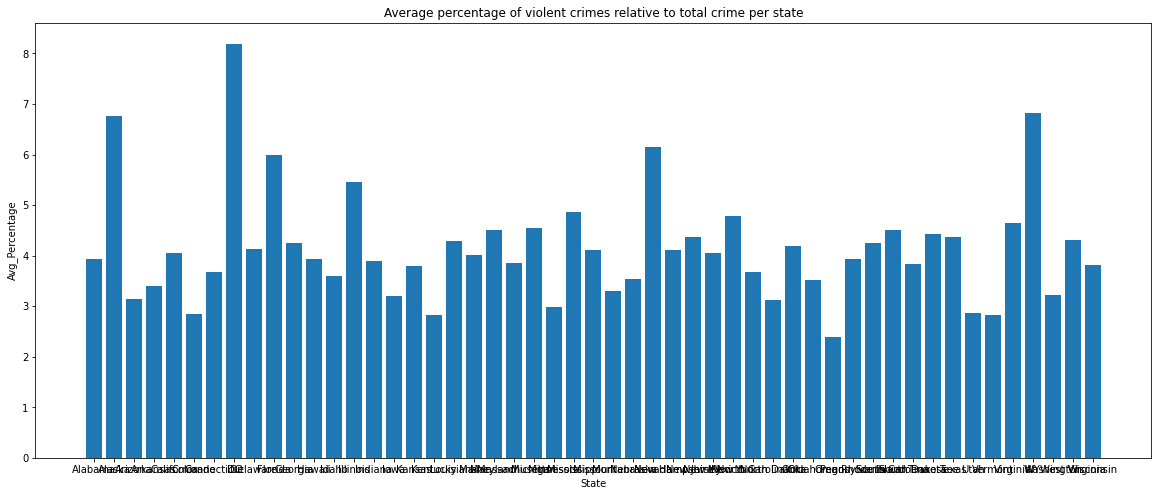

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 8))

# Create the bar chart
plt.bar(final_df['State'], final_df['Avg_Percentage'])

# Add labels and title
plt.xlabel('State')
plt.ylabel('Avg_Percentage')
plt.title('Average percentage of violent crimes relative to total crime per state')

# Show the chart
plt.show()

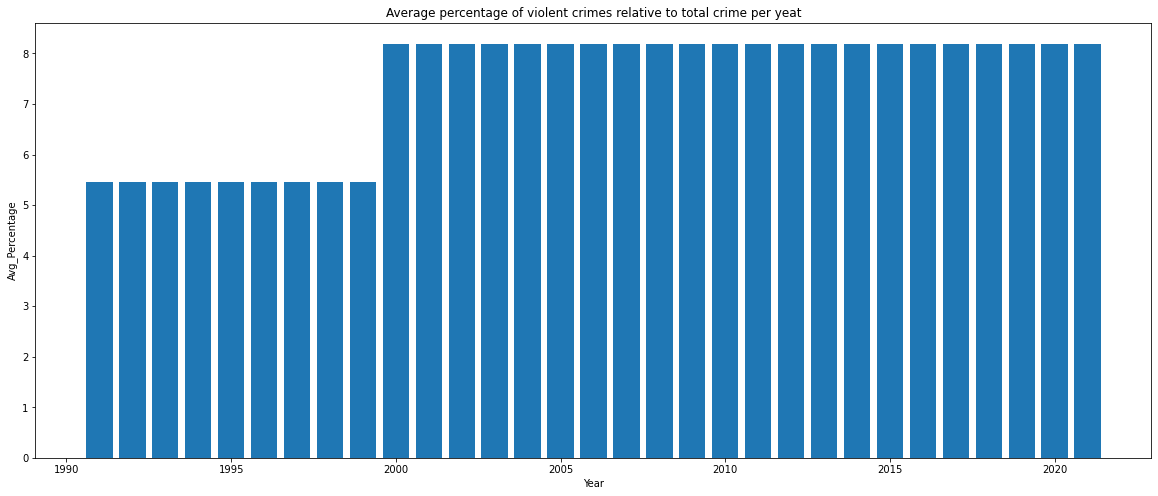

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 8))

# Create the bar chart
plt.bar(final_df['Year'], final_df['Avg_Percentage'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Avg_Percentage')
plt.title('Average percentage of violent crimes relative to total crime per yeat')

# Show the chart
plt.show()

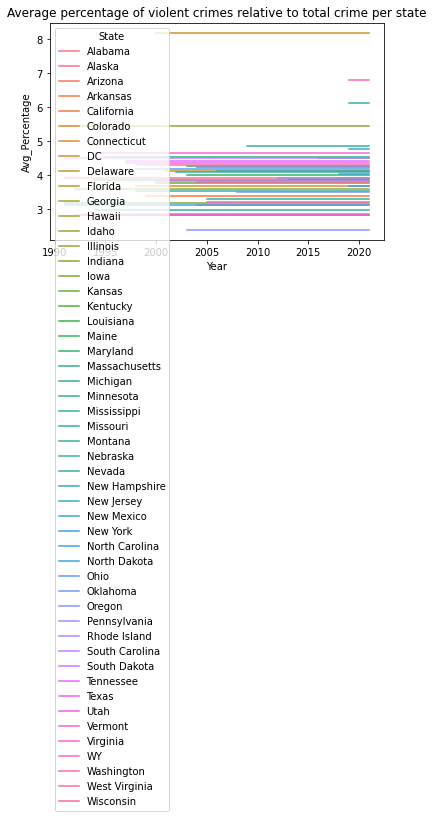

In [ ]:
import seaborn as sns

# Creating a lineplot
sns.lineplot(data=final_df,x='Year', y='Avg_Percentage', hue='State')
plt.title('Average percentage of violent crimes relative to total crime per state')

plt.show()

Question 3

In [ ]:
years=df_FBI['Year'].unique()

all_violent_crime = ['assault_offenses','homicide_offenses', 'robbery','kidnapping_abduction','sexual_assault' ]
violant_crimes = np.zeros(len(years))
homocide_crimes = np.zeros(len(years))
index = 0
for y in years:
  h_sum = 0
  v_sum =0
  h_sum = np.sum(df_FBI[(df_FBI['Offense'] == 'homicide_offenses') & (df_FBI['Year'] == y)]['Offense count'])
  v_sum = np.sum(df_FBI[(df_FBI['Offense'].isin(all_violent_crime)) & (df_FBI['Year'] == y)]['Offense count'])
  violant_crimes[index] = v_sum
  homocide_crimes[index] = h_sum
  index += 1

  #print("y: ", y, "h sum: ", h_sum, "v sum", v_sum)
plt.bar(years,violant_crimes )
plt.xlabel('Year')
plt.ylabel('Violent Crimes')
plt.title('Violent Crimes per Year from 1991 to 2021')
plt.show()
plt.bar(years,homocide_crimes)
plt.xlabel('Year')
plt.ylabel('homocide Crimes')
plt.title('homocide Crimes per Year from 1991 to 2021')
plt.show()


Question 4

In [ ]:
victims =df_NV.copy()[['Age', 'Sex', 'Race']]
population= df_NP.copy()[['Age', 'Sex', 'Race']]
vict_age_counts = victims['Age'].value_counts().sort_index()
pop_age_counts = population['Age'].value_counts().sort_index()

plt.figure()
(vict_age_counts / pop_age_counts).plot(kind='bar')
plt.suptitle("The frequency of non-fatal crime incidents vs the age of victim")
plt.xlabel("age")
plt.ylabel("Frequency of incidents")
plt.show()
### 
vict_sex_counts = victims['Sex'].value_counts().sort_index()
pop_sex_counts = population['Sex'].value_counts().sort_index()

plt.figure()
plt.pie(vict_sex_counts / pop_sex_counts, explode=[0.1,0], labels=vict_sex_counts.index, autopct='%.1f%%', shadow=True) 
plt.legend(title="Victim's sex")
plt.suptitle("The frequency of non fatal crime incidents vs the sex of victim")
plt.show()

##
vict_race_counts = victims['Race'].value_counts().sort_index()
pop_race_counts = population['Race'].value_counts().sort_index()
plt.pie(vict_race_counts /pop_race_counts, explode=explode, labels=vict_race_counts.index,textprops={'rotation': 45, 'ha':'center', 'va':'center'}, autopct='%.1f%%', shadow=True) 
plt.legend(title="Victim's race/ethnicity")
plt.suptitle('The frequency of non fatal crime incidents vs the race/ethnicity of victim')
plt.show()




Question 6

In [ ]:
import seaborn as sns

victims = df_NV.copy()[['Education level1', 'Annual household income- imputed', 'Victimization weight']]

plt.figure(figsize=(10,8))
sns.heatmap(victims.groupby(['Education level1', 'Annual household income- imputed'])['Victimization weight'].mean().unstack(),fmt=".2f", annot=True)
plt.xlabel('Gross household income')
plt.ylabel('Education level')
plt.title('Heatmap of Education level, Gross household income, and Rate of victimization')
plt.show()

#PART 3: Answering Questions:

1.1- Which type of non-fatal crime is the most under-reported

Text(0.5, 1.0, 'Number of Under-reported Crimes for Each Crime Type')

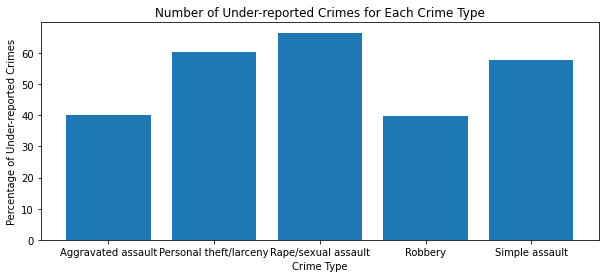

In [ ]:
"""

"""
V_Data = Personal_crime_victimization.copy()

# group the data by "Type of crime" and "Reporting to police"
grouped_data = V_Data.groupby(["Type of crime", "Reporting to police"])["Type of crime"].count()

# calculate the percentage of "No" reported crimes for each "Type of crime"
under_reported_crimes = grouped_data.loc[:, "No"] / grouped_data.groupby(level=0).sum() * 100

# plot the results
plt.figure(figsize=(10, 4))
plt.bar(under_reported_crimes.keys(), height=under_reported_crimes.values) 
plt.xlabel("Crime_Type")
plt.ylabel(" Under-reported Crimes_Percentage") 
plt.title("Numof Under-reported Crimes per Crime Type")

Is there an
association between the offender-victim relationship and the likelihood of a
crime being reported?

Text(0.5, 1.0, 'Numof reported crimes for Offender-Victim Relationship')

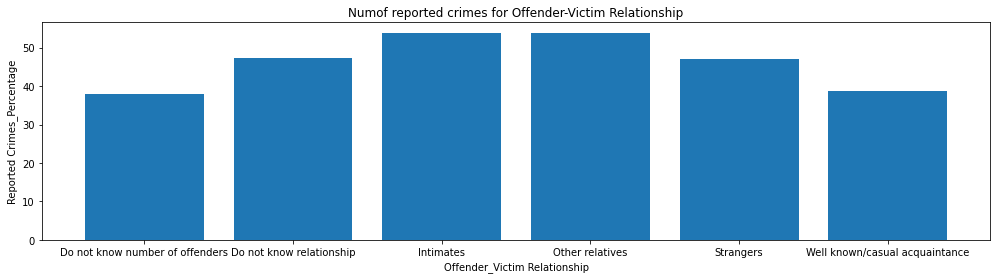

In [ ]:


V_Data = Personal_crime_victimization.copy()

# group the data by "Victim-offender relationship" and "Reporting to police"
grouped_data = V_Data.groupby(["Victim-offender relationship", "Reporting to police"])["Victim-offender relationship"].count()

# calculate the percentage of "Yes" reported crimes for each "Victim-offender relationship"
reported_crimes = grouped_data.loc[:, "Yes"] / grouped_data.groupby(level=0).sum() * 100

# plot the results
plt.figure(figsize=(17, 4))
plt.bar(reported_crimes.keys(), height=reported_crimes.values) 
plt.xlabel("Offender_Victim Relationship")
plt.ylabel("Reported Crimes_Percentage") 
plt.title("Numof reported crimes for Offender-Victim Relationship")


2- Who are the people (the demographic segment) that appear to be most at
risk of violent victimization? Who is the least at risk?

In [ ]:
# Read the data into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/Statistical Project/NVCD Data/CLEANED_Personal_crime_victimization.csv")

# Filter the data to include only rows where the type of crime is "Violent crime excluding simple assault"
df = df[df["Aggregate type of crime"] == "Violent crime"]

df

,Person ID,Year and quarter,Year,Age,Sex,Hispanic origin,Race,Race/ethnicity,Annual household income,Annual household income- imputed,...,Weapon category,Injury,Type of injury,Medical treatment for physical injuries,Offender age,Offender sex,Offender race/ethnicity,Victimization weight,Series,Series adjusted victimization weight
0,210176836193319999999923301,2004.1,2004,18-24,Female,Non-Hispanic,Black,Non-Hispanic black,"Less than $7,500",Invalid until 2017 Q1,...,No weapon,Not injured,No injury,Not injured,18-29,Male,Invalid until 2012 Q1,1952.973730,Series crime,1952.97373]
1,254207015147069329204211203,2009.1,2009,12-17,Male,Non-Hispanic,White,Non-Hispanic white,"$75,000 or more",Invalid until 2017 Q1,...,Knife,Not injured,No injury,Not injured,Multiple offenders of various ages,Male,Invalid until 2012 Q1,5570.687730,Series crime,5570.68773]
2,210313595043196799999912102,2004.1,2004,35-49,Male,Non-Hispanic,White,Non-Hispanic white,"$35,000 to $49,999",Invalid until 2017 Q1,...,No weapon,Not injured,No injury,Not injured,30 or older,Male,Invalid until 2012 Q1,3366.957480,Series crime,3366.95748]
3,252018211553075329282015501,2011.4,2011,25-34,Male,Hispanic,White,Hispanic,"$35,000 to $49,999",Invalid until 2017 Q1,...,No weapon,Not injured,No injury,Not injured,Residue,Male,Invalid until 2012 Q1,6991.560610,Series crime,6991.56061]
4,210376205057919299999921201,2004.1,2004,18-24,Male,Non-Hispanic,White,Non-Hispanic white,"$50,000 to $74,999",Invalid until 2017 Q1,...,No weapon,Injured,Minor injury,Not treated,18-29,Both male and female offenders,Invalid until 2012 Q1,2834.649050,Series crime,2834.64905]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63430,183634029968253156563611502,2021.3,2021,50-64,Male,Hispanic,White,Hispanic,"$75,000 or more","$100,000 to $199,999",...,No weapon,Not injured,No injury,Not injured,18-29,Male,Non-Hispanic black,661.570435,Series crime,661.570434570313]
63431,183656419935035256385913502,2021.3,2021,35-49,Female,Non-Hispanic,White,Non-Hispanic white,"$50,000 to $74,999","$50,000 to $99,999",...,No weapon,Not injured,No injury,Not injured,30 or older,Unknown,Unknown number of offenders,949.557495,Series crime,949.557495117188]
63432,193849022568657356823612702,2021.3,2021,50-64,Male,Non-Hispanic,White,Non-Hispanic white,"$75,000 or more","$100,000 to $199,999",...,Firearm,Not injured,No injury,Not injured,30 or older,Male,Non-Hispanic white,749.759033,Series crime,749.759033203125]
63433,193849022568657356823612702,2021.3,2021,50-64,Male,Non-Hispanic,White,Non-Hispanic white,"$75,000 or more","$100,000 to $199,999",...,Firearm,Not injured,No injury,Not injured,30 or older,Male,Non-Hispanic white,749.759033,Series crime,749.759033203125]


In [ ]:
# Group the data by "Race/ethnicity", "Sex", and "Age" columns
df_group = df.groupby(["Race/ethnicity","Sex","Age"])["Victimization weight"].mean()

# Sort the groups by mean weight, in descending order
df_group = df_group.sort_values(ascending=False)

# Print the top 10 groups
print(df_group.head(10))

Race/ethnicity                              Sex     Age  
Non-Hispanic black                          Male    18-24    4192.025072
                                                    25-34    4069.670940
                                                    12-17    3894.775836
                                            Female  12-17    3843.140490
Non-Hispanic more than one race             Female  18-24    3768.525748
Non-Hispanic black                          Female  18-24    3698.179283
Non-Hispanic more than one race             Male    12-17    3663.673214
Non-Hispanic American Indian/Alaska Native  Male    18-24    3564.966323
Hispanic                                    Male    18-24    3506.281926
Non-Hispanic white                          Male    18-24    3489.934232
Name: Victimization weight, dtype: float64


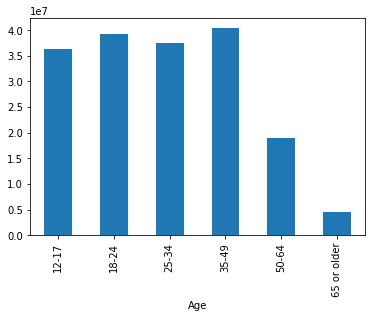

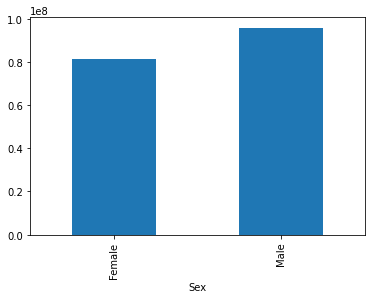

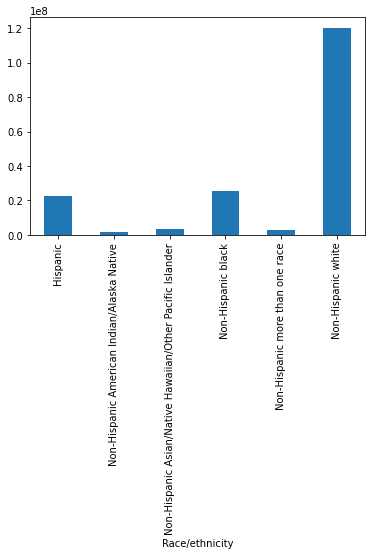

In [ ]:
victims_data = df.copy()
# Group the data by age, and compute the total number of victims in each age group
age_groups = victims_data.groupby("Age").sum()

# Plot the total number of victims in each age group
age_groups["Victimization weight"].plot(kind="bar")
plt.show()

sex_groups = victims_data.groupby("Sex").sum()
sex_groups["Victimization weight"].plot(kind="bar")
plt.show()

ethnicity_groups = victims_data.groupby("Race/ethnicity").sum()
ethnicity_groups["Victimization weight"].plot(kind="bar")
plt.show()

3- Of all victims of non-fatal crimes who suffer an injury, which demographic
is the most likely to receive medical attention at the scene? Which is the
least likely?

Text(0.5, 1.0, 'the relation between sex and race of the people getting treated at the scene')

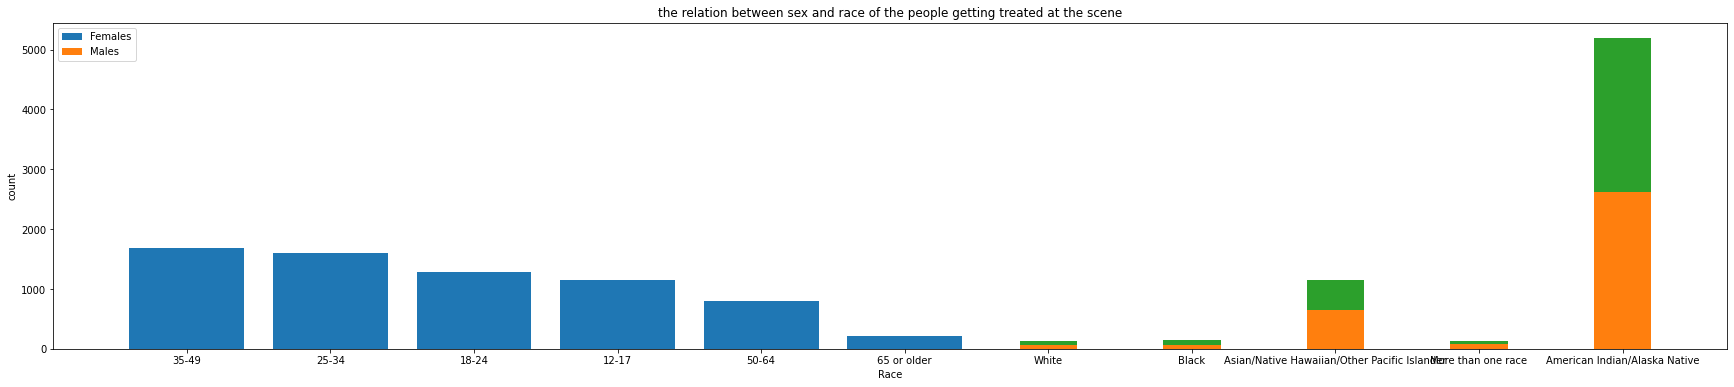

In [ ]:
"""

"""

victims_data = Personal_crime_victimization.copy()
demographics = ["Age", "Sex", "Race"]

# Select rows where injury is 'Injured' and medical treatment is 'Treated at scene, home, medical office, or other location'
condition = (victims_data['Injury'] == "Injured") & (victims_data['Medical treatment for physical injuries'] == 'Treated at scene, home, medical office, or other location')
Specified_data = victims_data.loc[condition, demographics]

# Initialize a new figure with specified size
plt.figure(figsize=(30,6))

# Bar chart for frequency of non-fatal crime incidents in relation to victim's race
plt.bar(Specified_data['Age'].value_counts().keys(), height=Specified_data['Age'].value_counts().values)
plt.legend(['Females','Males'])
plt.xlabel('race of victim')
plt.ylabel('count')
plt.title("the frequency of non fatal crime incedents in relation to victim race")

# Group splitted_data by 'Race' and 'Sex', and count the number of rows in each group
temp = Specified_data.groupby(['Race','Sex']).count().reset_index()

# Get the number of 'Females' and 'Males' in each group
females = temp[temp['Sex'] == 'Female']['Age'].to_list()
males = temp[temp['Sex'] == 'Male']['Age'].to_list()

# Bar chart for the relation between sex and race of people getting treated at the scene
plt.bar(x, females, 0.4)
plt.bar(x, males, 0.4, bottom=females)
plt.legend(['Females','Males'])
plt.xlabel('Race')
plt.ylabel('count')
plt.title("the relation between sex and race of the people getting treated at the scene")



Text(0.5, 1.0, 'the relation between sex and race of the people getting treated at the scene')

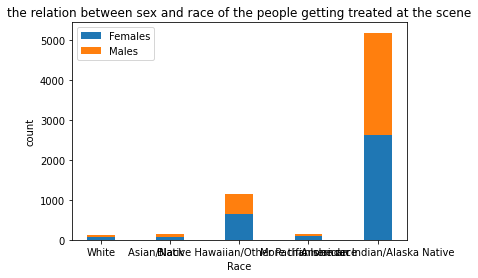

In [ ]:
# Group splitted_data by 'Race' and 'Sex', and count the number of rows in each group
temp = splitted_data.groupby(['Race','Sex']).count().reset_index()

# Get the number of 'Females' and 'Males' in each group
females = temp[temp['Sex'] == 'Female']['Age'].to_list()
males = temp[temp['Sex'] == 'Male']['Age'].to_list()

# Bar chart for the relation between sex and race of people getting treated at the scene
plt.bar(x, females, 0.4)
plt.bar(x, males, 0.4, bottom=females)
plt.legend(['Females','Males'])
plt.xlabel('Race')
plt.ylabel('count')
plt.title("the relation between sex and race of the people getting treated at the scene")

4- Which class of crimes is associated with the highest rate of
same-offense-recidivism; i.e. prison re-entry for the same offense within 3
years of release?

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Statistical Project/Recidivism Data/NIJ_s_Recidivism_Challenge_Full_Dataset.csv")
df.dropna(axis=1)
df

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25830,26756,M,BLACK,23-27,9,False,5.0,Standard,At least some college,1,...,0.000000,0.0,0.189507,0.572044,False,True,True,False,False,1
25831,26758,M,WHITE,38-42,25,False,5.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.757098,0.576104,False,True,False,True,False,1
25832,26759,M,BLACK,33-37,15,False,5.0,Standard,At least some college,3 or more,...,NaN,NaN,0.711138,0.894125,False,True,False,True,False,1
25833,26760,F,WHITE,33-37,15,NaN,5.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.000000,0.000000,True,False,False,False,False,1


In [ ]:
df1 = df.loc[:, ['Prison_Offense','Recidivism_Within_3years']]
df1

,Prison_Offense,Recidivism_Within_3years
0,Drug,False
1,Violent/Non-Sex,True
2,Drug,True
3,Property,False
4,Violent/Non-Sex,True
...,...,...
25830,NaN,True
25831,NaN,True
25832,NaN,True
25833,NaN,False


In [ ]:
# Replace all the NA values with None
df1.dropna(axis=1)

# group the data by Prison_Offense
offense_group = df1.groupby(['Prison_Offense']).sum()
offense_group

,Recidivism_Within_3years
Prison_Offense,
Drug,2804
Other,1705
Property,5323
Violent/Non-Sex,2955
Violent/Sex,262


In [ ]:

# calculate recidivism rate for each offense
recidivism_rate = offense_group.Recidivism_Within_3years/(offense_group['Recidivism_Within_3years'].sum())
recidivism_rate

NameError: ignored

In [ ]:
# Print the highest rate
print(recidivism_rate.idxmax(),recidivism_rate.max())

Property 0.4079239788489539


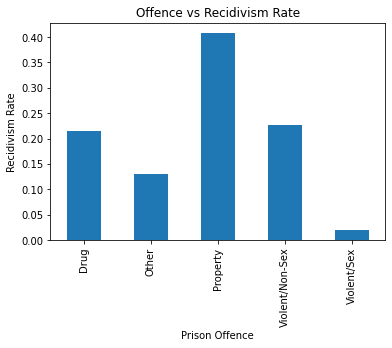

In [ ]:
# Plotting a bar chart
recidivism_rate.plot.bar()
plt.xlabel("Prison Offence")
plt.ylabel("Recidivism Rate")
plt.title("Offence vs Recidivism Rate")
plt.show()

5- Are prisoners who are younger at the time of release more or less likely to
reoffend than those who are older?

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the data into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/Statistical Project/NVCD Data/CLEANED_Personal_crime_victimization.csv")

# Subset the data to include only those individuals who were released from prison
released = df[df['Aggregate type of crime'] == 'Released']

# Create a new column indicating whether or not each individual reoffended
released['reoffended'] = released['Type of crime'].apply(lambda x: 1 if x == 'Reoffense' else 0)

# Create a contingency table of reoffenses and non-reoffenses by age group
age_table = pd.crosstab(released['Age'], released['reoffended'])
age_table

reoffended
Age


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the data into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/Statistical Project/Recidivism Data/NIJ_s_Recidivism_Challenge_Full_Dataset.csv")
df.dropna(axis=1)


# Create a new column indicating whether or not each individual reoffended
df['Age_Group'] = df['Age_at_Release'].apply(lambda x: 1 if x == '18-22' else 0)
df['Recidivism'] = df['Recidivism_Within_3years'].apply(lambda x: 1 if x == True else 0)
df1 = df.loc[:, ['Age_Group','Recidivism']]

# Create a contingency table of reoffenses and non-reoffenses by age group
age_table = df.loc[:,['Age_Group', 'Recidivism']]

df['Recidivism_Within_3years'].unique()[0]
df['Recidivism'].unique()

array([0, 1])

In [ ]:
df["new_col"] = np.where((df["Age_at_Release"].str.contains("18-22")) & (df["Recidivism_Within_3years"] == True), 1, 0)

In [ ]:
df['new_col'].unique()

array([0, 1])

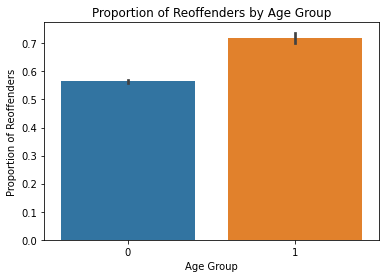

In [ ]:
import seaborn as sns

sns.barplot(x='Age_Group', y='Recidivism', data=df1, estimator=np.mean)
plt.xlabel("Age Group")
plt.ylabel("Proportion of Reoffenders")
plt.title("Proportion of Reoffenders by Age Group")
plt.show()

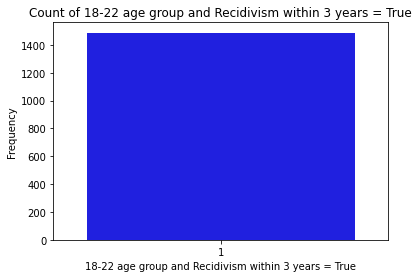

In [ ]:
import seaborn as sns

# Create a bar chart of the new_col column where the value is 1
sns.countplot(x='new_col', data=df[df['new_col'] == 1], color='blue')
plt.title("Count of 18-22 age group and Recidivism within 3 years = True")
plt.xlabel("18-22 age group and Recidivism within 3 years = True")
plt.ylabel("Frequency")
plt.show()

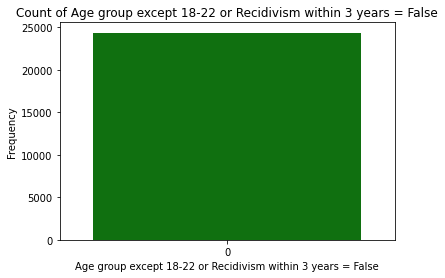

In [ ]:
# Create a bar chart of the new_col column where the value is 0
sns.countplot(x='new_col', data=df[df['new_col'] == 0], color='green')
plt.title("Count of Age group except 18-22 or Recidivism within 3 years = False")
plt.xlabel("Age group except 18-22 or Recidivism within 3 years = False")
plt.ylabel("Frequency")
plt.show()

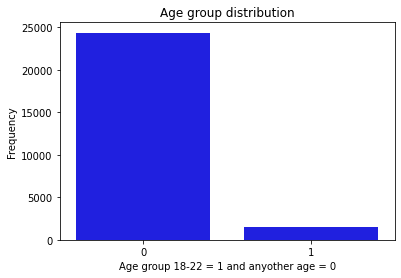

In [ ]:
import seaborn as sns

sns.countplot(x='new_col', data=df, color='blue')
plt.title("Age group distribution")
plt.xlabel("Age group 18-22 = 1 and anyother age = 0")
plt.ylabel("Frequency")
plt.show()


#PART 4: Hypothesis Testing:

In [ ]:
Firearm_data = pd.read_csv('/content/drive/MyDrive/Statistical Project/Firearm laws per state/Cleaned_Firearm_law_per_stat.csv')
Firearm_data.head()

,state,year,Dealer regulations,Buyer regulations,Prohibitions for high-risk gun possession,Background checks,Ammunition regulations,Possession regulations,Concealed carry permitting,Assault weapons and large-capacity magazines,Child access prevention,Gun trafficking,Stand your ground,Preemption,Immunity,Domestic violence
0,Alabama,1991,7,1,1,0,0,0,3,0,0,0,1,1,1,0
1,Alabama,1992,7,1,1,0,0,0,3,0,0,0,1,1,1,1
2,Alabama,1993,7,1,1,0,0,0,3,0,0,0,1,1,1,1
3,Alabama,1994,7,1,1,0,0,0,3,0,0,0,1,1,1,1
4,Alabama,1995,7,1,1,0,0,0,3,0,0,0,1,1,1,1


## Claim 1

In [ ]:
final_df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
final_df.drop(final_df[final_df.State == 'District of Columbia'].index, inplace=True)
final_df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [ ]:
f2=Firearm_data['state'].unique()
f2

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [ ]:
Firearm_data = pd.read_csv('/content/drive/MyDrive/Statistical Project/Firearm laws per state/Cleaned_Firearm_law_per_stat.csv')
Firearm_data.head()

,state,year,Dealer regulations,Buyer regulations,Prohibitions for high-risk gun possession,Background checks,Ammunition regulations,Possession regulations,Concealed carry permitting,Assault weapons and large-capacity magazines,Child access prevention,Gun trafficking,Stand your ground,Preemption,Immunity,Domestic violence
0,Alabama,1991,7,1,1,0,0,0,3,0,0,0,1,1,1,0
1,Alabama,1992,7,1,1,0,0,0,3,0,0,0,1,1,1,1
2,Alabama,1993,7,1,1,0,0,0,3,0,0,0,1,1,1,1
3,Alabama,1994,7,1,1,0,0,0,3,0,0,0,1,1,1,1
4,Alabama,1995,7,1,1,0,0,0,3,0,0,0,1,1,1,1


In [ ]:
state_counts = Firearm_data.groupby("state").sum().rename_axis('state').reset_index()
columns_to_sum = ["Dealer regulations","Buyer regulations","Prohibitions for high-risk gun possession","Background checks","Ammunition regulations","Possession regulations","Concealed carry permitting","Assault weapons and large-capacity magazines","Child access prevention","Gun trafficking","Stand your ground","Preemption","Immunity","Domestic violence"]
state_sums = Firearm_data.groupby("state")[columns_to_sum].sum()
states=Firearm_data['state']
agg_func = {"Dealer regulations" : "sum","Buyer regulations":"sum","Prohibitions for high-risk gun possession":"sum","Background checks":"sum","Ammunition regulations":"sum","Possession regulations":"sum","Concealed carry permitting":"sum","Assault weapons and large-capacity magazines":"sum","Child access prevention":"sum","Gun trafficking":"sum","Stand your ground":"sum","Preemption":"sum","Immunity":"sum","Domestic violence":"sum"}
new_firearm = Firearm_data.groupby("state").agg(agg_func)
new_firearm

,Dealer regulations,Buyer regulations,Prohibitions for high-risk gun possession,Background checks,Ammunition regulations,Possession regulations,Concealed carry permitting,Assault weapons and large-capacity magazines,Child access prevention,Gun trafficking,Stand your ground,Preemption,Immunity,Domestic violence
state,,,,,,,,,,,,,,
Alabama,144,9,42,0,0,0,105,0,0,0,15,9,9,32
Alaska,0,29,30,0,0,30,45,0,0,0,22,0,8,0
Arizona,0,0,117,0,0,31,82,0,0,0,19,0,8,68
Arkansas,0,0,90,0,0,78,144,0,0,0,30,6,2,20
California,407,256,213,330,91,140,177,187,193,143,30,60,19,383
Colorado,38,0,27,120,0,52,114,8,0,42,30,36,9,74
Connecticut,350,164,195,251,40,116,120,135,145,56,30,90,30,312
Delaware,106,38,126,69,23,32,109,0,108,54,30,0,0,86
Florida,33,42,33,3,17,238,91,0,90,60,14,0,10,23


In [ ]:
law = list(Firearm_data.columns)
law.remove('state')
law.remove('year')
law

['Dealer regulations',
 'Buyer regulations',
 'Prohibitions for high-risk gun possession',
 'Background checks',
 'Ammunition regulations',
 'Possession regulations',
 'Concealed carry permitting',
 'Assault weapons and large-capacity magazines',
 'Child access prevention',
 'Gun trafficking',
 'Stand your ground',
 'Preemption',
 'Immunity',
 'Domestic violence']

In [ ]:
law = list(Firearm_data.columns)
law.remove('state')
law.remove('year')

# Create a list of violent crime rates for states with stricter firearm control laws
# Assume that a higher number in the "Dealer regulations" column indicates stricter firearm control laws
stricter_crime_rates = []
for i in range(len(Firearm_data)):
  for j in law:
    if Firearm_data[j][i] > 7:
        stricter_crime_rates.append(Firearm_data["state"][i])

# Create a list of violent crime rates for states with less strict firearm control laws
# Assume that a lower number in the "Dealer regulations" column indicates less strict firearm control laws
less_strict_crime_rates = []
for i in range(len(Firearm_data)):
  for j in law:
    if Firearm_data[j][i] <= 7:
        less_strict_crime_rates.append(Firearm_data['state'][i])

In [ ]:
import scipy.stats as stats

t, p = stats.ttest_ind(final_df[final_df["State"].isin(stricter_crime_rates)]['Avg_Percentage'], final_df[final_df["State"].isin(less_strict_crime_rates)]['Avg_Percentage'])

# Compare the p-value to the significance level (0.05)
if p < 0.05:
    print("There is a significant difference in the means of the violent crime rate between states with stricter and less strict firearm control laws")
else:
    print("There is no significant difference in the means of the violent crime rate between states with stricter and less strict firearm control laws")
print("p-value",p)

There is no significant difference in the means of the violent crime rate between states with stricter and less strict firearm control laws
p-value 0.16253157093824025


## Claim 2

Males make more crimes than females

In [ ]:
df_NV = pd.read_csv("/content/drive/MyDrive/Statistical Project/NVCD Data/CLEANED_Personal_crime_victimization.csv")

In [ ]:
df_NV.columns

Index(['Person ID', 'Year and quarter', 'Year', 'Age', 'Sex',
       'Hispanic origin', 'Race', 'Race/ethnicity', 'Annual household income',
       'Annual household income- imputed', 'Marital status', 'Population size',
       'Region', 'Location of residence',
       'Household Locale-BJS geography definitions', 'Education level1',
       'Education level2', 'Veteran status', 'Citizenship status',
       'Aggregate type of crime', 'Type of crime',
       'Violent crime excluding simple assault', 'Reporting to police',
       'Victim services', 'Location of crime', 'Victim-offender relationship',
       'Presence of weapon', 'Weapon category', 'Injury', 'Type of injury',
       'Medical treatment for physical injuries', 'Offender age',
       'Offender sex', 'Offender race/ethnicity', 'Victimization weight',
       'Series', 'Series adjusted victimization weight'],
      dtype='object')

In [ ]:
df_NV['Offender sex'].unique()

array(['Male', 'Both male and female offenders', 'Female', 'Unknown',
       'Residue'], dtype=object)

In [ ]:
df_NV['Type of crime'].unique()

array(['Simple assault', 'Robbery', 'Aggravated assault',
       'Rape/sexual assault', 'Personal theft/larceny'], dtype=object)

In [ ]:
df = df_NV[(df_NV['Offender sex'] == 'Male') | (df_NV['Offender sex'] == 'Female')]
df

,Person ID,Year and quarter,Year,Age,Sex,Hispanic origin,Race,Race/ethnicity,Annual household income,Annual household income- imputed,...,Weapon category,Injury,Type of injury,Medical treatment for physical injuries,Offender age,Offender sex,Offender race/ethnicity,Victimization weight,Series,Series adjusted victimization weight
0,210176836193319999999923301,2004.1,2004,18-24,Female,Non-Hispanic,Black,Non-Hispanic black,"Less than $7,500",Invalid until 2017 Q1,...,No weapon,Not injured,No injury,Not injured,18-29,Male,Invalid until 2012 Q1,1952.973730,Series crime,1952.97373]
1,254207015147069329204211203,2009.1,2009,12-17,Male,Non-Hispanic,White,Non-Hispanic white,"$75,000 or more",Invalid until 2017 Q1,...,Knife,Not injured,No injury,Not injured,Multiple offenders of various ages,Male,Invalid until 2012 Q1,5570.687730,Series crime,5570.68773]
2,210313595043196799999912102,2004.1,2004,35-49,Male,Non-Hispanic,White,Non-Hispanic white,"$35,000 to $49,999",Invalid until 2017 Q1,...,No weapon,Not injured,No injury,Not injured,30 or older,Male,Invalid until 2012 Q1,3366.957480,Series crime,3366.95748]
3,252018211553075329282015501,2011.4,2011,25-34,Male,Hispanic,White,Hispanic,"$35,000 to $49,999",Invalid until 2017 Q1,...,No weapon,Not injured,No injury,Not injured,Residue,Male,Invalid until 2012 Q1,6991.560610,Series crime,6991.56061]
5,252018987943474229049316301,2011.4,2011,35-49,Male,Non-Hispanic,Black,Non-Hispanic black,"$50,000 to $74,999",Invalid until 2017 Q1,...,Do not know if offender had weapon,Injured,Serious injury,"Treated at scene, home, medical office, or oth...",18-29,Male,Invalid until 2012 Q1,4438.619360,Series crime,4438.61936]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63429,204438526546340256459914201,2021.4,2021,35-49,Female,Non-Hispanic,More than one race,Non-Hispanic more than one race,"$35,000 to $49,999","$25,000 to $49,999",...,No weapon,Not injured,No injury,Not injured,Residue,Male,Unknown race/ ethnicity,1035.222900,Series crime,1035.22290039063]
63430,183634029968253156563611502,2021.3,2021,50-64,Male,Hispanic,White,Hispanic,"$75,000 or more","$100,000 to $199,999",...,No weapon,Not injured,No injury,Not injured,18-29,Male,Non-Hispanic black,661.570435,Series crime,661.570434570313]
63432,193849022568657356823612702,2021.3,2021,50-64,Male,Non-Hispanic,White,Non-Hispanic white,"$75,000 or more","$100,000 to $199,999",...,Firearm,Not injured,No injury,Not injured,30 or older,Male,Non-Hispanic white,749.759033,Series crime,749.759033203125]
63433,193849022568657356823612702,2021.3,2021,50-64,Male,Non-Hispanic,White,Non-Hispanic white,"$75,000 or more","$100,000 to $199,999",...,Firearm,Not injured,No injury,Not injured,30 or older,Male,Non-Hispanic white,749.759033,Series crime,749.759033203125]


In [ ]:
from scipy.stats import ttest_ind
df_NV['Aggregate type of crime'] = pd.to_numeric(df_NV['Aggregate type of crime'], errors='coerce')
# Extract the number of violent crimes committed by males and females
male_crimes = df_NV[df_NV['Offender sex'] == 'Male']['Aggregate type of crime']
female_crimes = df_NV[df_NV['Offender sex'] == 'Female']['Aggregate type of crime']

# Conduct the t-test and obtain the t-statistic and p-value
t_stat, p_val = ttest_ind(male_crimes, female_crimes)

# Compare the p-value with the significance level
alpha = 0.05
if p_val < alpha:
    print(f'p-value {p_val} < {alpha}. The null hypothesis is rejected.')
else:
    print(f'p-value {p_val} > {alpha}. The null hypothesis is accepted.')

p-value nan > 0.05. The null hypothesis is accepted.


#PART 5: Regression Analysis:

#Recidivism data for the state of Georgia [2013-2015]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Statistical Project/Recidivism Data/NIJ_s_Recidivism_Challenge_Full_Dataset.csv')
df.head()

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 25835 non-null  int64  
 1   Gender                                             25835 non-null  object 
 2   Race                                               25835 non-null  object 
 3   Age_at_Release                                     25835 non-null  object 
 4   Residence_PUMA                                     25835 non-null  int64  
 5   Gang_Affiliated                                    22668 non-null  object 
 6   Supervision_Risk_Score_First                       25360 non-null  float64
 7   Supervision_Level_First                            24115 non-null  object 
 8   Education_Level                                    25835 non-null  object 
 9   Depend

In [ ]:
!pip install eli5
import eli5
from sklearn import preprocessing
from sklearn import utils
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## multiple regression:

In [ ]:
columns_of_interest = ['Race', 'Age_at_Release', 'Gang_Affiliated', 'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd',
                       'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges',
                       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges', 'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 
                       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop', 'Prior_Conviction_Episodes_Drug', 'Prior_Conviction_Episodes_PPViolationCharges', 
                       'Prior_Conviction_Episodes_DomesticViolenceCharges', 'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole, Prior_Revocations_Probation',
                       'Prior_Revocations_Parole', 'Prior_Revocations_Probation']

In [ ]:
Y= df['Supervision_Risk_Score_First']
X =  df[df.columns[df.columns.isin(columns_of_interest)]]

X.shape, Y.shape, X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Race                                               25835 non-null  object
 1   Age_at_Release                                     25835 non-null  object
 2   Gang_Affiliated                                    22668 non-null  object
 3   Prior_Arrest_Episodes_Felony                       25835 non-null  object
 4   Prior_Arrest_Episodes_Misd                         25835 non-null  object
 5   Prior_Arrest_Episodes_Violent                      25835 non-null  object
 6   Prior_Arrest_Episodes_Property                     25835 non-null  object
 7   Prior_Arrest_Episodes_Drug                         25835 non-null  object
 8   Prior_Arrest_Episodes_PPViolationCharges           25835 non-null  object
 9   Prior_Arrest_Epis

((25835, 21), (25835,), None)

In [ ]:
#Handle NaN vlaues
print('before: ', X.isnull().sum())
X = X.fillna(df.mean())
print('After: ', X.isnull().sum())

before:  Race                                                    0
Age_at_Release                                          0
Gang_Affiliated                                      3167
Prior_Arrest_Episodes_Felony                            0
Prior_Arrest_Episodes_Misd                              0
Prior_Arrest_Episodes_Violent                           0
Prior_Arrest_Episodes_Property                          0
Prior_Arrest_Episodes_Drug                              0
Prior_Arrest_Episodes_PPViolationCharges                0
Prior_Arrest_Episodes_DVCharges                         0
Prior_Arrest_Episodes_GunCharges                        0
Prior_Conviction_Episodes_Felony                        0
Prior_Conviction_Episodes_Misd                          0
Prior_Conviction_Episodes_Viol                          0
Prior_Conviction_Episodes_Prop                          0
Prior_Conviction_Episodes_Drug                          0
Prior_Conviction_Episodes_PPViolationCharges            0
Prior

<ipython-input-10-010400a40154>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X = X.fillna(df.mean())


In [ ]:
#Encode Categorical variable
# One-hot encode the variables
X = pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 76 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   Prior_Arrest_Episodes_DVCharges                     25835 non-null  bool 
 1   Prior_Arrest_Episodes_GunCharges                    25835 non-null  bool 
 2   Prior_Conviction_Episodes_Viol                      25835 non-null  bool 
 3   Prior_Conviction_Episodes_PPViolationCharges        25835 non-null  bool 
 4   Prior_Conviction_Episodes_DomesticViolenceCharges   25835 non-null  bool 
 5   Prior_Conviction_Episodes_GunCharges                25835 non-null  bool 
 6   Prior_Revocations_Parole                            25835 non-null  bool 
 7   Prior_Revocations_Probation                         25835 non-null  bool 
 8   Race_BLACK                                          25835 non-null  uint8
 9   Race_WHITE       

In [ ]:
column_maxes = X.max()

print(column_maxes.max())

True


In [ ]:
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y)
y_transformed

array([2, 5, 6, ..., 4, 4, 4])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)
# Create a linear regression model
model = DecisionTreeClassifier()


# Fit the model to the training data
result = model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Report the coefficients and p-values
#coef = model.coef_
p_values = model.predict_proba(X)
print("P values", p_values)

# obtain feature importances
importances = model.feature_importances_

# create a list of feature importances and their corresponding column names
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df.columns, importances)]

# sort the feature importances by importance
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# print the feature importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]


perm = eli5.sklearn.PermutationImportance(model, random_state=42).fit(X_test, y_test)

# Display the permutation feature importance
weights = eli5.explain_weights(perm, feature_names=X_test.columns.tolist())
print("weights: ", weights)
#print('Feature Importance:', resultt.summary())


# Evaluate the model's performance
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

# calculate the F1 score using the micro-average
f1 = f1_score(y_test, y_pred, average='micro')

# print the F1 score
print(f'F1 Score: {f1}')


P values [[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Variable: Prior_Arrest_Episodes_DVCharges Importance: 0.71
Variable: Prior_Arrest_Episodes_PPViolationCharges Importance: 0.21
Variable: Prior_Arrest_Episodes_Drug Importance: 0.08
Variable: ID                   Importance: 0.0
Variable: Gender               Importance: 0.0
Variable: Race                 Importance: 0.0
Variable: Age_at_Release       Importance: 0.0
Variable: Residence_PUMA       Importance: 0.0
Variable: Gang_Affiliated      Importance: 0.0
Variable: Supervision_Risk_Score_First Importance: 0.0
Variable: Supervision_Level_First Importance: 0.0
Variable: Education_Level      Importance: 0.0
Variable: Dependents           Importance: 0.0
Variable: Prison_Offense       Importance: 0.0
Variable: Prison_Years         Importance: 0.0
Variable: Prior_Arrest_Episodes_Felony Importance: 0.0
Variable: Prior_Arrest_Episodes_Misd Importance: 0.0
Variable: Prior_Arrest_Episodes_Violent Importance: 0.0
Variable: P

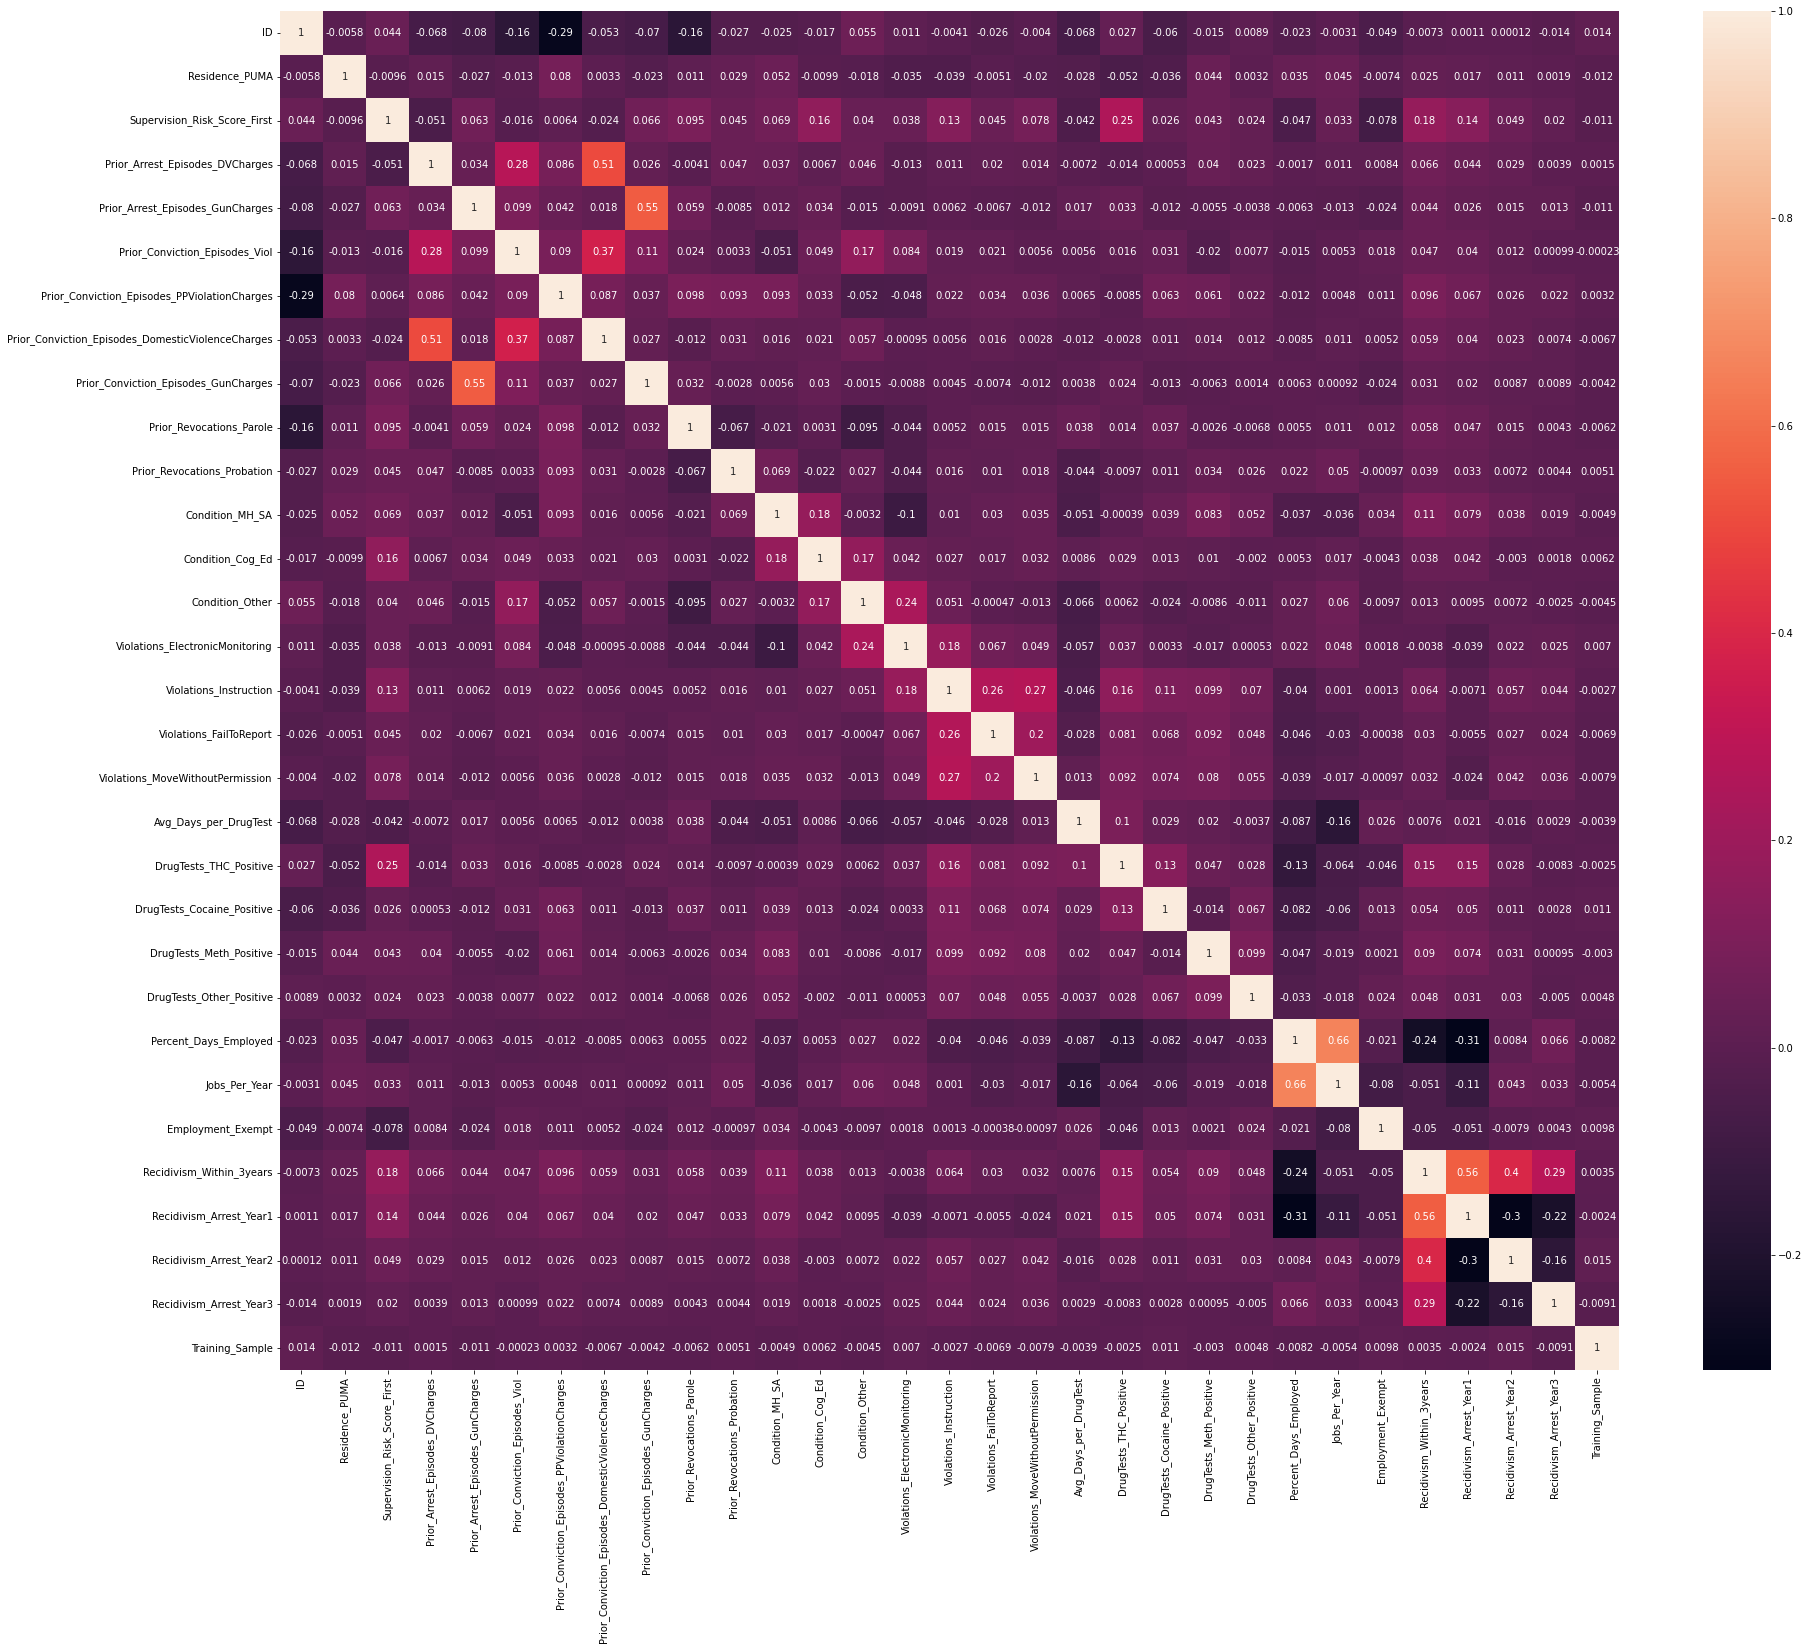

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# compute the correlation matrix
corr = df.corr()

fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(corr, annot=True,ax=ax)
plt.show()

#Part 6

In [ ]:
numerical_columns = ['Residence_PUMA','Supervision_Risk_Score_First', 'Avg_Days_per_DrugTest', 'DrugTests_THC_Positive',
       'DrugTests_Cocaine_Positive', 'DrugTests_Meth_Positive',
       'DrugTests_Other_Positive', 'Percent_Days_Employed', 'Jobs_Per_Year', 'Training_Sample']

categorical_columns = ['Gender', 'Race', 'Age_at_Release', 'Gang_Affiliated', 
       'Supervision_Level_First', 'Education_Level', 'Dependents',
       'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony',
       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
       'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_PPViolationCharges',
       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop',
       'Prior_Conviction_Episodes_Drug',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole',
       'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed',
       'Condition_Other', 'Violations_ElectronicMonitoring',
       'Violations_Instruction', 'Violations_FailToReport',
       'Violations_MoveWithoutPermission', 'Delinquency_Reports',
       'Program_Attendances', 'Program_UnexcusedAbsences', 'Residence_Changes',
       'Employment_Exempt', 'Recidivism_Within_3years',
       'Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2']

In [ ]:
#Encode Categorical variable
# One-hot encode the variables
encoded_part_X = pd.get_dummies(df[df.columns[df.columns.isin(categorical_columns)]])
encoded_part_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Columns: 131 entries, Prior_Arrest_Episodes_DVCharges to Residence_Changes_3 or more
dtypes: bool(19), uint8(112)
memory usage: 3.2 MB


In [ ]:
Y= df['Recidivism_Arrest_Year3']

X = pd.concat([encoded_part_X, df[df.columns[df.columns.isin(numerical_columns)]]], axis=1)

X.shape, Y.shape, X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Columns: 141 entries, Prior_Arrest_Episodes_DVCharges to Training_Sample
dtypes: bool(19), float64(8), int64(2), uint8(112)
memory usage: 5.2 MB


((25835, 141), (25835,), None)

In [ ]:
#Handle NaN vlaues
print('before: ', X.isnull().sum())
X = X.fillna(df.mean())
print('After: ', X.isnull().sum())

before:  Prior_Arrest_Episodes_DVCharges                         0
Prior_Arrest_Episodes_GunCharges                        0
Prior_Conviction_Episodes_Viol                          0
Prior_Conviction_Episodes_PPViolationCharges            0
Prior_Conviction_Episodes_DomesticViolenceCharges       0
                                                     ... 
DrugTests_Meth_Positive                              5172
DrugTests_Other_Positive                             5172
Percent_Days_Employed                                 462
Jobs_Per_Year                                         808
Training_Sample                                         0
Length: 141, dtype: int64
After:  Prior_Arrest_Episodes_DVCharges                      0
Prior_Arrest_Episodes_GunCharges                     0
Prior_Conviction_Episodes_Viol                       0
Prior_Conviction_Episodes_PPViolationCharges         0
Prior_Conviction_Episodes_DomesticViolenceCharges    0
                                            

<ipython-input-26-010400a40154>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X = X.fillna(df.mean())


In [ ]:
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y)
y_transformed

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler to the DataFrame
scaler.fit(X)

# Transform the DataFrame and store the result in a new variable
X_scaled = scaler.transform(X)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size=0.2, random_state=42)
# Create a linear regression model
model = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', probability = True)

# Fit the model to the training data
result = model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


# Evaluate the model's performance
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')


accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Coefficients: [[-4.92027853e-06  4.54711828e-06 -8.44293804e-06  8.51331767e-06
   5.73273784e-06 -2.12292442e-05  1.12772507e-06 -6.86184691e-06
   7.33389606e-06  2.69815288e-06 -1.16497762e-05  1.82955873e-06
   1.70042109e-06 -2.84173947e-06 -6.56040375e-06 -2.02070648e-06
   9.87920440e-01 -9.15443220e-01 -7.62805483e-01  2.44914202e-07
  -2.44914201e-07 -3.91146048e-06  3.91146048e-06 -8.99860760e-07
   3.44498265e-07  5.80523968e-07 -2.86573535e-06  7.99850305e-06
   6.90556175e-08 -4.66492377e-06 -1.99741880e-06  2.25789316e-06
  -6.21882812e-06 -4.18159881e-06 -1.29190143e-05 -7.90648548e-06
   5.42100322e-06  6.88808289e-07 -9.59861734e-06 -1.74818228e-06
   4.94586933e-07  1.08174965e-05  2.55203573e-06  5.94211117e-07
   1.04966882e-05 -9.03304166e-07 -8.75364221e-06  9.53344296e-07
   3.77806233e-07  4.81424470e-06 -6.86899263e-06 -1.24332790e-17
   1.26613990e-05  2.26834423e-06 -4.91125343e-06 -5.11391119e-06
  -7.48495770e-07  1.85114691e-06 -8.79988644e-07 -2.51126340e